# Multivariate Exploratory analysis

In this notebook, the purpose is to investigate meaningful relationships between target variable (fraud) and variables such as Age, income, etc....

## Data importing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from pathlib import Path
DATADIR= Path("/workspaces/fraud-detection-BAF-Dataset-Suite-/FraudDataset")
data_dir =DATADIR
if not data_dir.exists():
    raise FileNotFoundError(f"Data directory not found: {data_dir}")
extension = "csv"  # Change to "csv" if needed
data_paths = [str(p) for p in sorted(data_dir.glob(f"*.{extension}"))]
data_paths[0]
dataset=pd.read_csv("train_engineered_fraud_dataset.csv")
dataset.head(3)

,fraud_bool,income,customer_age,days_since_request,intended_balcon_amount,payment_type,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,...,phone_home_and_mobile_valid,proposed_credit_limit_binned,prev_address_months_count_binary,bank_months_count_binary,customer_profile,residential_history_stability,banking_relationship_stability,velocity_6h_imputed,log_velocity_6h_imputed,log_session_length_in_minutes_imputed
0,0,0.3,40,0.006735,102.453711,AA,7850.955007,6742.080561,5,5,...,Invalid_Valid,1000+,prev_address_missing,bank_months_valid,prev_address_missing_current_address_valid_has...,prev_address_missing_current_address_valid,bank_months_valid_has_other_cards_invalid,13096.035018,9.480065,2.786544
1,0,0.8,20,0.010095,-0.849551,AD,5745.251481,5941.664859,3,18,...,Valid_Valid,1000+,prev_address_missing,bank_months_valid,prev_address_missing_current_address_valid_has...,prev_address_missing_current_address_valid,bank_months_valid_has_other_cards_invalid,9223.283431,9.129486,1.213087
2,0,0.8,40,0.012316,-1.490386,AB,5471.988958,5992.555113,15,11,...,Invalid_Valid,<=200,prev_address_valid,bank_months_valid,prev_address_valid_current_address_valid_has_o...,prev_address_valid_current_address_valid,bank_months_valid_has_other_cards_invalid,4471.472149,8.405473,3.123710


Create a copy of the dataset with the most important features emerged from the analysis below.

In [3]:
dataset_copy=dataset.copy()

## Exploratory analysis of continuous variables

###

### name_email_similarity_logit

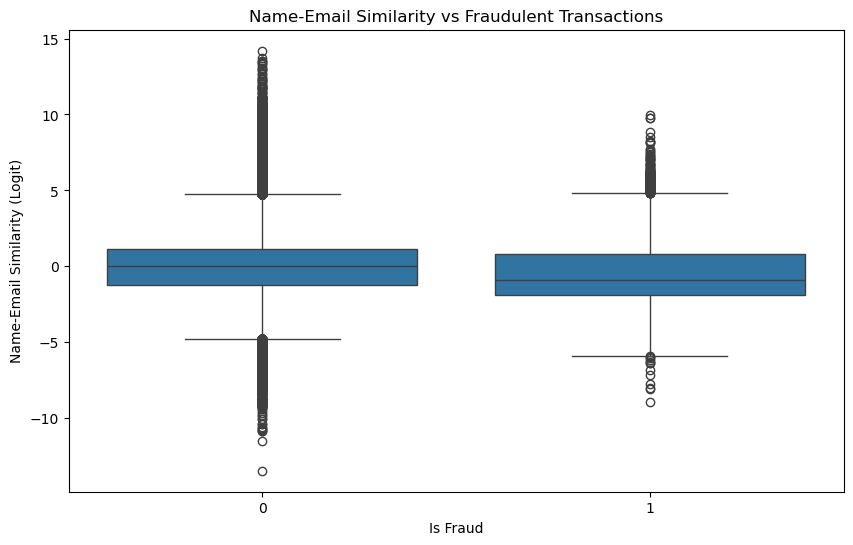

In [4]:
# Create a figure between (X) name_email_similarity_logit and fraud_bool
plt.figure(figsize=(10, 6))
sns.boxplot(x='fraud_bool', y='name_email_similarity_logit', data=dataset)
plt.title('Name-Email Similarity vs Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Name-Email Similarity (Logit)')
plt.show()

**Slight** indication that the less similarity may indicate more chances of fraud.

### days_since_request

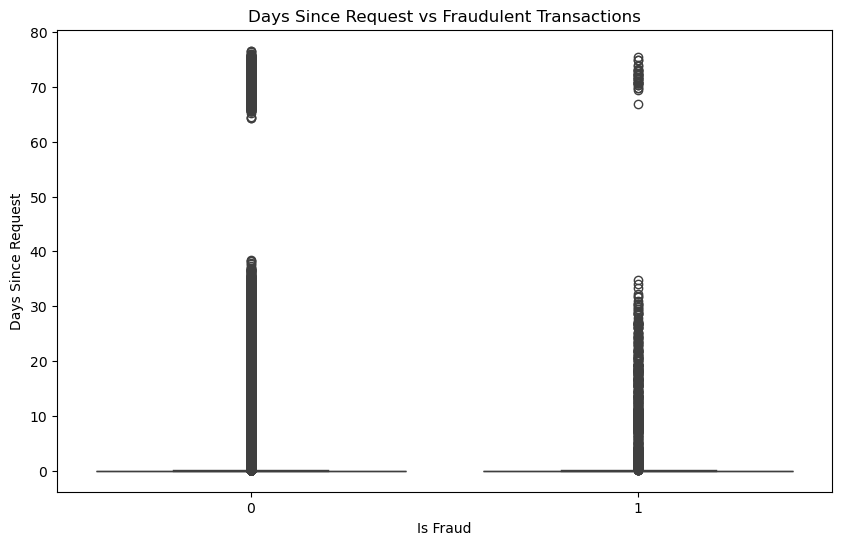

In [5]:
# Create a figure between (X) days_since_request and fraud_bool
plt.figure(figsize=(10, 6))
sns.boxplot(x='fraud_bool', y='days_since_request', data=dataset)
plt.title('Days Since Request vs Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Days Since Request')
plt.show()


In [6]:
dataset=dataset.drop(columns=["days_since_request"],axis='columns')

### intended_balcon_amount

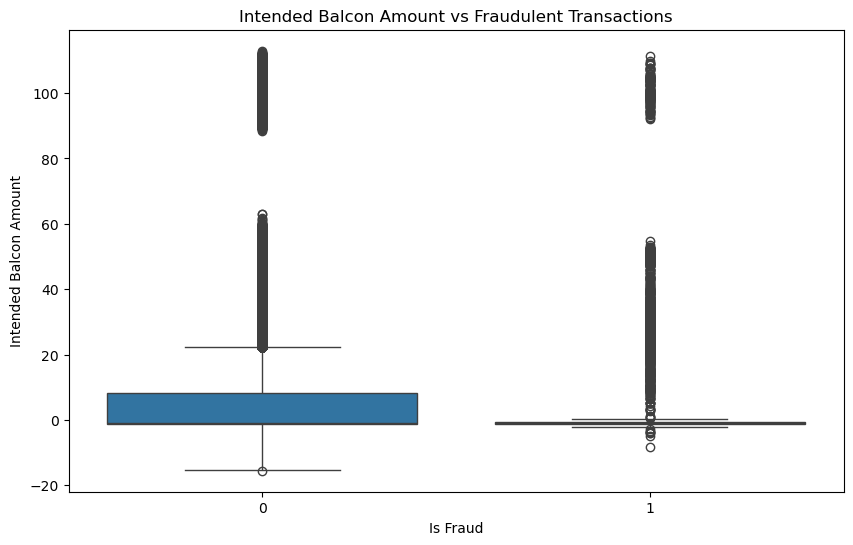

In [7]:
# Create a figure between (X) days_since_request and fraud_bool
plt.figure(figsize=(10, 6))
sns.boxplot(x='fraud_bool', y='intended_balcon_amount', data=dataset)
plt.title('Intended Balcon Amount vs Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Intended Balcon Amount')
plt.show()


**Difficult** to identify a meaningful association here, probably the categorical variable will be more indicative.

In [8]:
dataset=dataset.drop(columns="intended_balcon_amount",axis='columns')

### log_velocity_6h_imputed

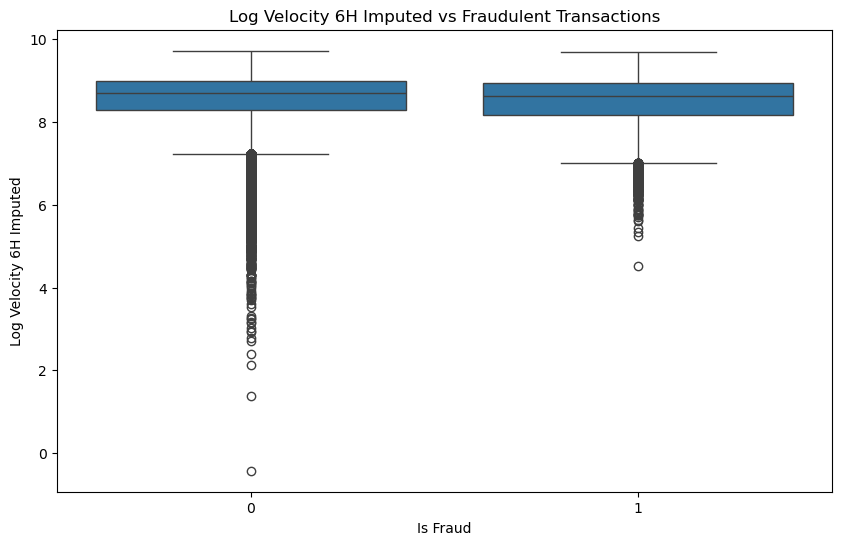

In [9]:
# Create a figure between (X) log_velocity_6h_imputed and fraud_bool
plt.figure(figsize=(10, 6))
sns.boxplot(x='fraud_bool', y='log_velocity_6h_imputed', data=dataset)
plt.title('Log Velocity 6H Imputed vs Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Log Velocity 6H Imputed')
plt.show()


In [10]:
dataset=dataset.drop(columns=["log_velocity_6h_imputed","velocity_6h_imputed"],axis='columns')


### Velocity 24h

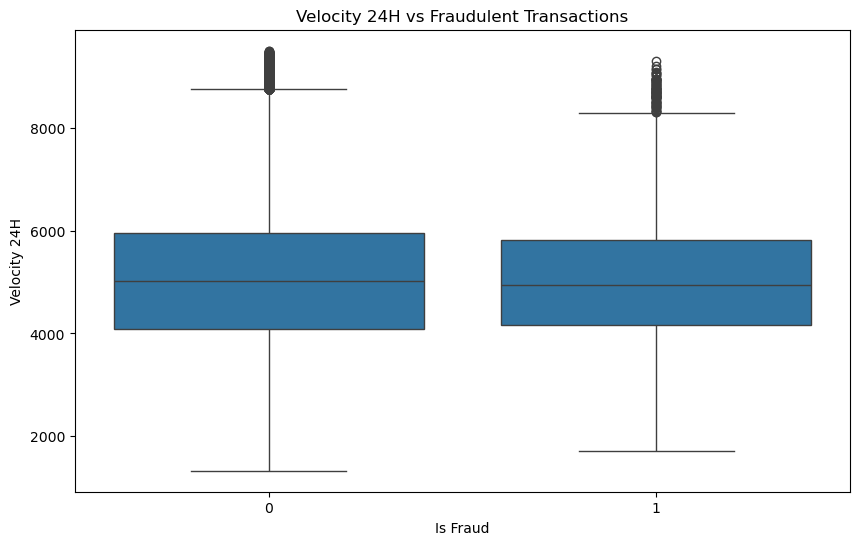

In [11]:
# Create a figure between (X) velocity_24h and fraud_bool
plt.figure(figsize=(10, 6))
sns.boxplot(x='fraud_bool', y='velocity_24h', data=dataset)
plt.title('Velocity 24H vs Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Velocity 24H')
plt.show()

In [12]:
dataset=dataset.drop(columns="velocity_24h",axis='columns')

### velocity_4w

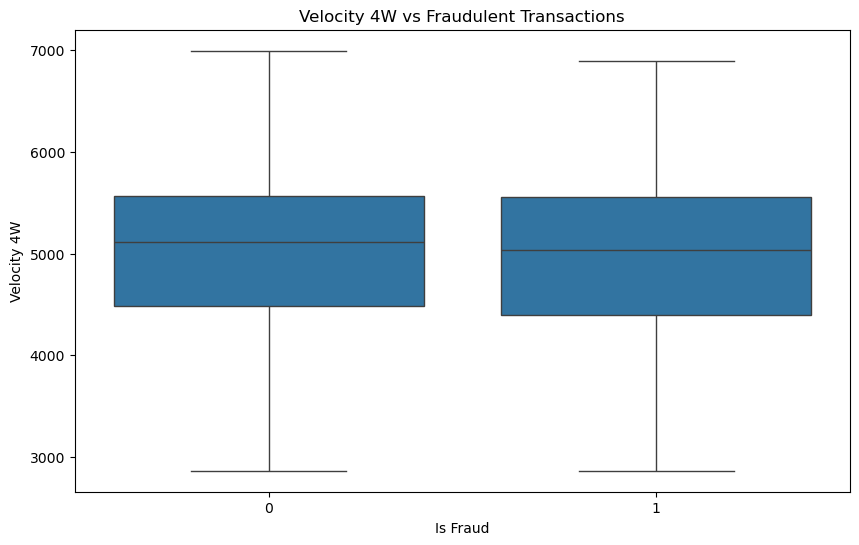

In [13]:
# Create a figure between (X) velocity_4w and fraud_bool
plt.figure(figsize=(10, 6))
sns.boxplot(x='fraud_bool', y='velocity_4w', data=dataset)
plt.title('Velocity 4W vs Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Velocity 4W')
plt.show()

In [14]:
dataset=dataset.drop(columns="velocity_4w",axis='columns')

In [15]:
dataset=dataset.drop(columns=["velocity_24h_log","velocity_4w_log"],axis='columns')

**Not meaningful relationship** between velocity_6h, velocity_24h and velocity_4w are and fraud bool.

### Bank_branch_count_8w

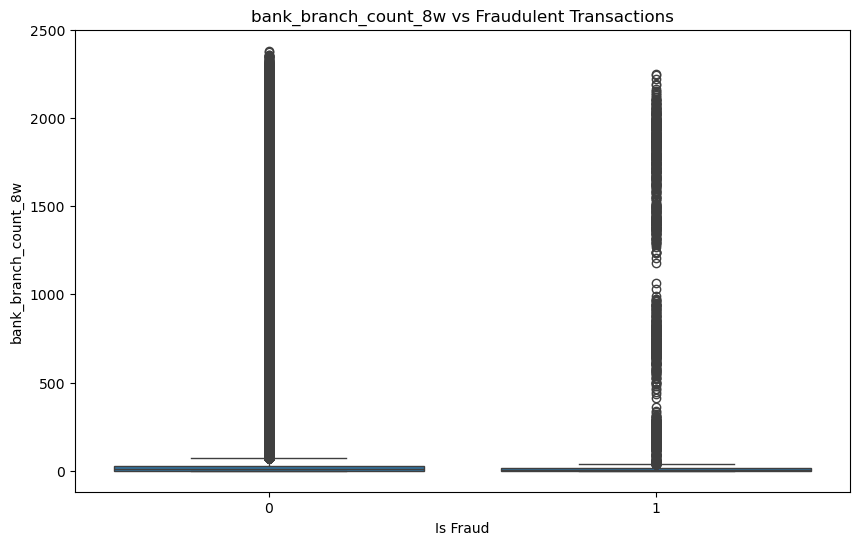

In [16]:
# Create a figure between (X) bank_months_count and fraud_bool
plt.figure(figsize=(10, 6))
sns.boxplot(x='fraud_bool', y='bank_branch_count_8w', data=dataset)
plt.title('bank_branch_count_8w vs Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('bank_branch_count_8w')
plt.show()


**no significant association**

In [17]:
dataset=dataset.drop(columns="bank_branch_count_8w",axis='columns')

### date_of_birth_distinct_emails_4w

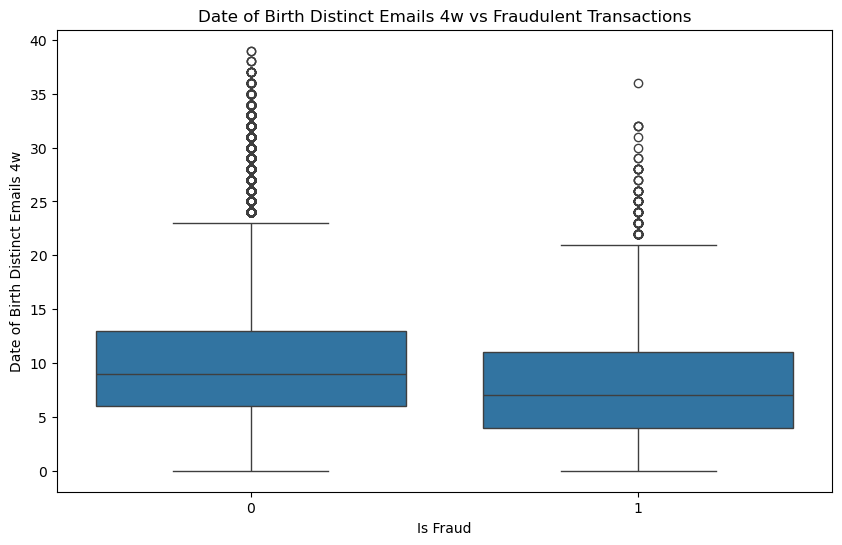

In [18]:
# Create a figure between (X) date_of_birth_distinct_emails_4w and fraud_bool
plt.figure(figsize=(10, 6))
sns.boxplot(x='fraud_bool', y='date_of_birth_distinct_emails_4w', data=dataset)
plt.title('Date of Birth Distinct Emails 4w vs Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Date of Birth Distinct Emails 4w')
plt.show()


**Slight** indication that the when a user has **rare** birth date may be indication of fraud (?)

### credit_risk_score

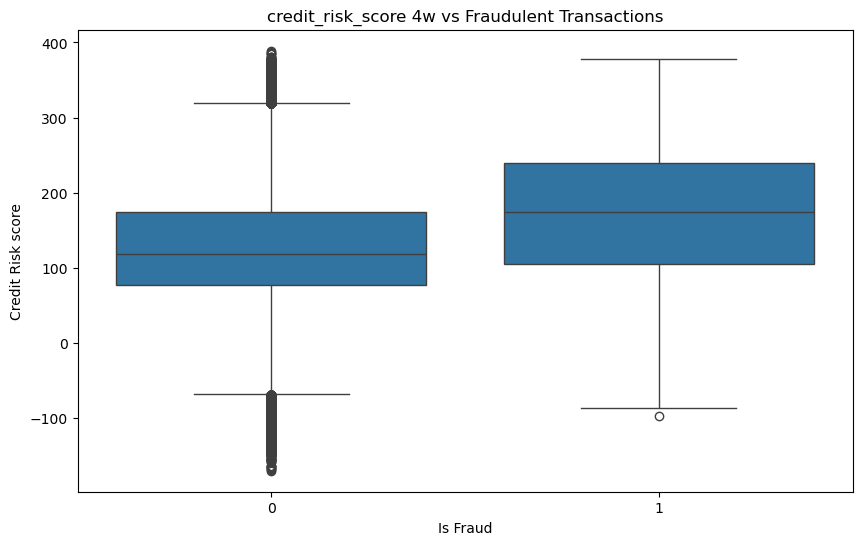

In [19]:
# Create a figure between (X) credit_risk_score and fraud_bool
plt.figure(figsize=(10, 6))
sns.boxplot(x='fraud_bool', y='credit_risk_score', data=dataset)
plt.title('credit_risk_score 4w vs Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Credit Risk score')
plt.show()


**Significant** relationship by the means of that the higher riskier is the credit of customer, the more chances to be fraud.

### bank_months_count

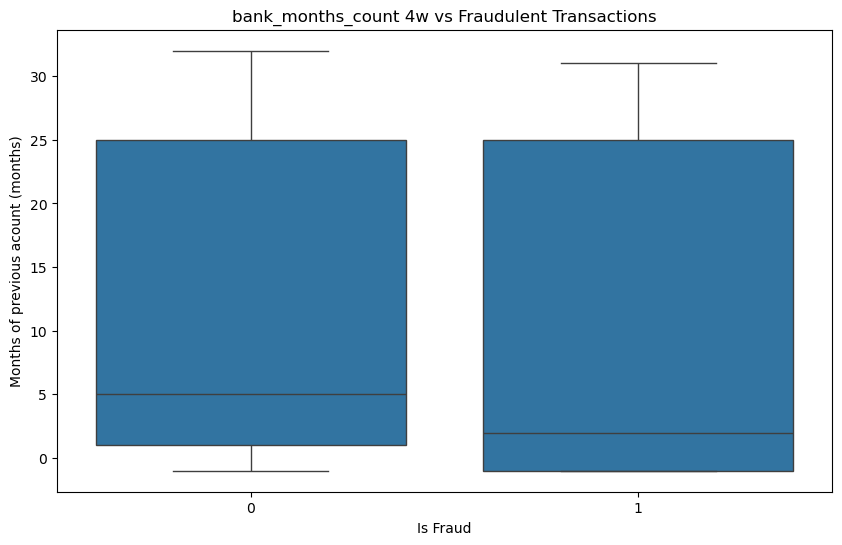

In [20]:
# Create a figure between (X) bank_months_count and fraud_bool
plt.figure(figsize=(10, 6))
sns.boxplot(x='fraud_bool', y='bank_months_count', data=dataset)
plt.title('bank_months_count 4w vs Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Months of previous acount (months)')
plt.show()


**Slight** indicationt hat the more recent is the account the more chances of fraud. **However**, the binary discretized variable will demonstrate better the potential association with fraudulent.

In [21]:
dataset=dataset.drop(columns="bank_months_count",axis='columns')

### zip_count_4w_log

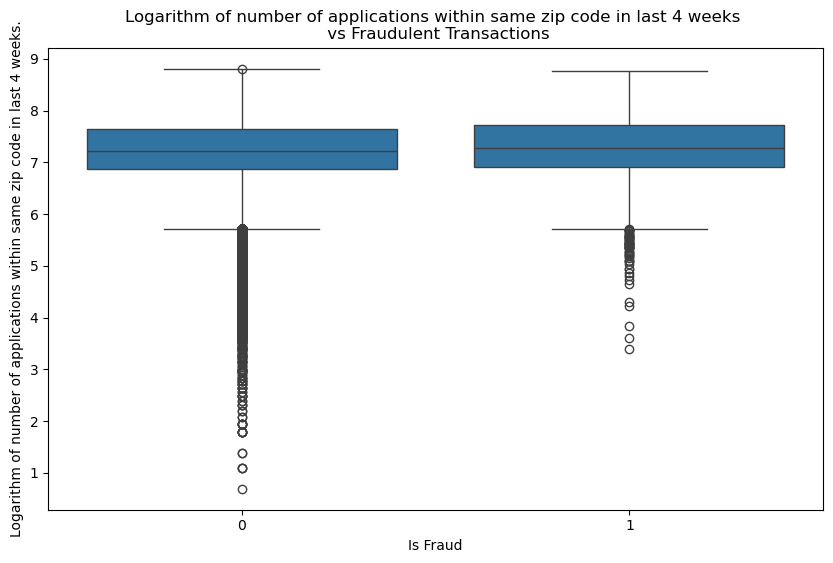

In [22]:
# Create a figure between (X) zip_count_4w_log and fraud_bool
plt.figure(figsize=(10, 6))
sns.boxplot(x='fraud_bool', y='zip_count_4w_log', data=dataset)
plt.title('Logarithm of number of applications within same zip code in last 4 weeks \n vs Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Logarithm of number of applications within same zip code in last 4 weeks.')
plt.show()


**Not** meaningful association between number of same zip code of customer with fraudulent applications.

In [23]:
dataset=dataset.drop(columns="zip_count_4w_log",axis='columns')

### customer age

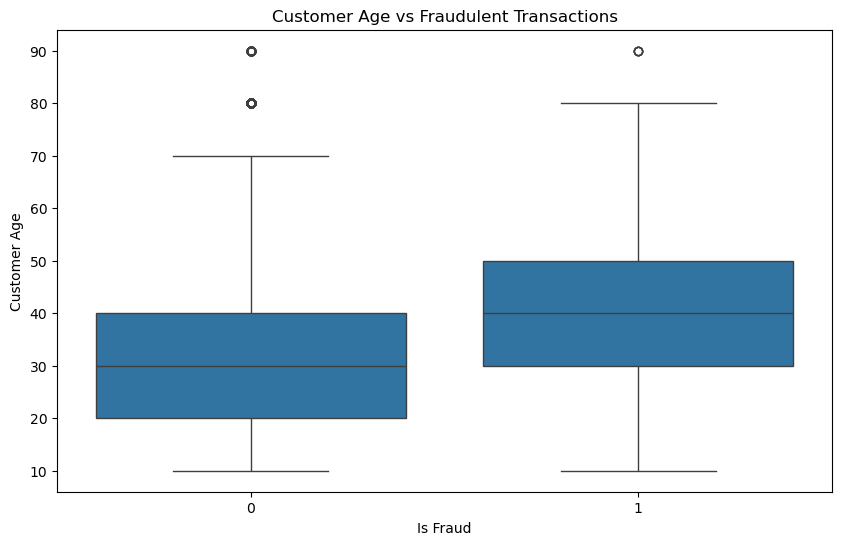

In [24]:
# Create a figure between (X) customer_age and fraud_bool
plt.figure(figsize=(10, 6))
sns.boxplot(x='fraud_bool', y='customer_age', data=dataset)
plt.title('Customer Age vs Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Customer Age')
plt.show()


**Slightly** positive relationship by the means of that until age 30-35 it seems that there is less fraud detection rate but ages>35 indicate more chances for fraud detection.

### log_session_length_in_minutes

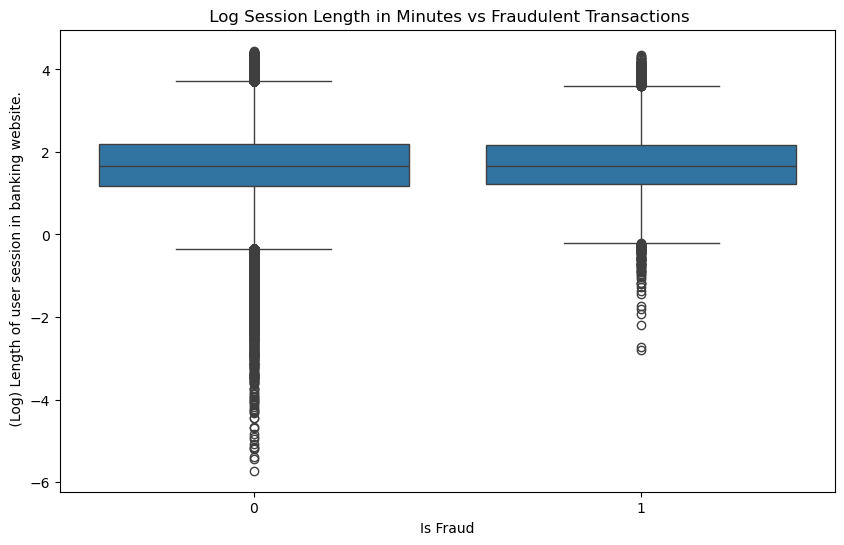

In [25]:
# Create a figure between (X) log_session_length_in_minutes_imputed and fraud_bool
plt.figure(figsize=(10, 6))
sns.boxplot(x='fraud_bool', y='log_session_length_in_minutes_imputed', data=dataset)
plt.title(' Log Session Length in Minutes vs Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel(' (Log) Length of user session in banking website.')
plt.show()

**Not improtant relationship** since across range of fraud cases regarding session length in minutes, there is not an apparent separation between fraud and non fraud cases.

In [26]:
dataset=dataset.drop(columns="log_session_length_in_minutes_imputed",axis='columns')

### proposed_credit_limit

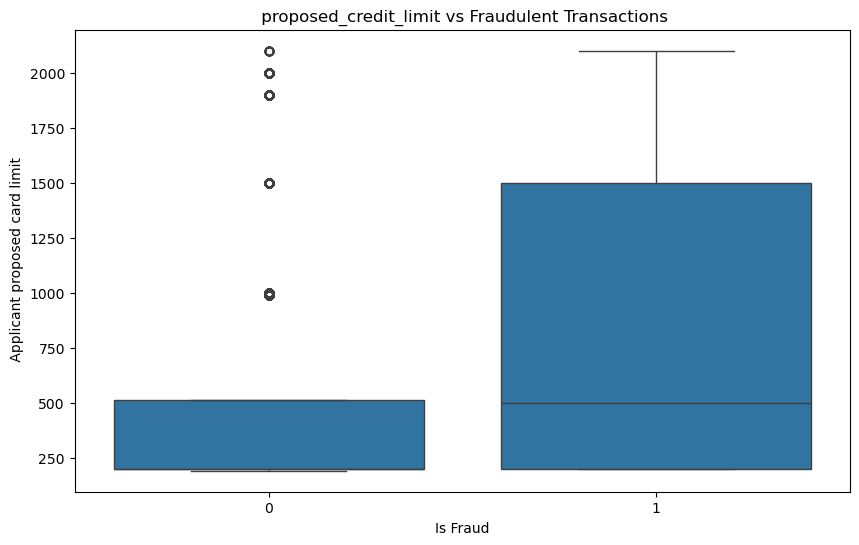

In [27]:
# Create a figure between (X) proposed_credit_limit and fraud_bool
plt.figure(figsize=(10, 6))
sns.boxplot(x='fraud_bool', y='proposed_credit_limit', data=dataset)
plt.title(' proposed_credit_limit vs Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel(' Applicant proposed card limit')
plt.show()

**Meaningful** association between proposed credit limit and fraud.

### Inference in continuous variables

**Important relationships**

1) date_of_birth_distinct_emails_8w
2) credit_risk_score
3) Customer age (**however** to check binned corresponding feature.)
4) logit_name_email_similarity
5) Proposed credit limit (**however** to check binned corresponding feature.)

## Exploratory analysis of categorical/ordinal variables

### income

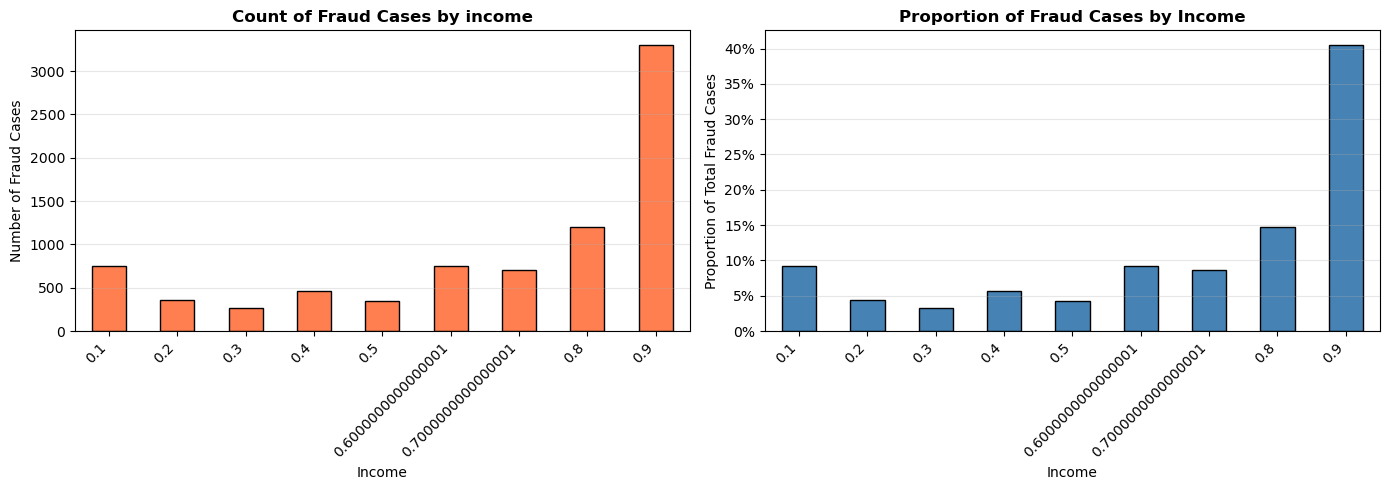


=== Fraud Cases Distribution by Payment Type ===
 Income  Count  Proportion  Percentage
    0.1    748    0.091768        9.18
    0.2    361    0.044289        4.43
    0.3    267    0.032757        3.28
    0.4    461    0.056557        5.66
    0.5    350    0.042940        4.29
    0.6    746    0.091523        9.15
    0.7    707    0.086738        8.67
    0.8   1206    0.147957       14.80
    0.9   3305    0.405472       40.55

=== Non-Fraud Cases Distribution by Payment Type ===
 Income  Count  Proportion  Percentage
    0.1 134101    0.170430       17.04
    0.2  57707    0.073340        7.33
    0.3  42038    0.053426        5.34
    0.4  66341    0.084313        8.43
    0.5  45254    0.057514        5.75
    0.6  89202    0.113368       11.34
    0.7  82213    0.104485       10.45
    0.8 111085    0.141179       14.12
    0.9 158897    0.201944       20.19


In [28]:
# Filter for fraud cases only (fraud_bool==1)
fraud_cases = dataset[dataset['fraud_bool'] == 1]
non_fraud_cases = dataset[dataset['fraud_bool'] == 0]
# Count fraud cases in each days_since_request_binned category
fraud_by_bin_income = fraud_cases['income'].value_counts().sort_index()
non_fraud_by_bin_income = non_fraud_cases['income'].value_counts().sort_index()
# Calculate proportions relative to total fraud cases
fraud_proportions_by_bin_of_income = fraud_by_bin_income / fraud_by_bin_income.sum()
non_fraud_by_bin_of_income_proportions = non_fraud_by_bin_income / non_fraud_by_bin_income.sum()
# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Count of fraud cases by bin
fraud_by_bin_income.plot(kind='bar', ax=ax1, color='coral', edgecolor='black')
ax1.set_title('Count of Fraud Cases by income', fontsize=12, fontweight='bold')
ax1.set_xlabel('Income')
ax1.set_ylabel('Number of Fraud Cases')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.grid(axis='y', alpha=0.3)

# Plot 2: Proportion of fraud cases by bin
fraud_proportions_by_bin_of_income.plot(kind='bar', ax=ax2, color='steelblue', edgecolor='black')
ax2.set_title('Proportion of Fraud Cases by Income', fontsize=12, fontweight='bold')
ax2.set_xlabel('Income')
ax2.set_ylabel('Proportion of Total Fraud Cases')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary table
print("\n=== Fraud Cases Distribution by Payment Type ===")
summary_df_fraud_by_income = pd.DataFrame({
    'Income': fraud_by_bin_income.index,
    'Count': fraud_by_bin_income.values,
    'Proportion': fraud_proportions_by_bin_of_income.values,
    'Percentage': (fraud_proportions_by_bin_of_income.values * 100).round(2)
})
print(summary_df_fraud_by_income.to_string(index=False))

# Print summary table
print("\n=== Non-Fraud Cases Distribution by Payment Type ===")
summary_df_non_fraud_by_income = pd.DataFrame({
    'Income': non_fraud_by_bin_income.index,
    'Count': non_fraud_by_bin_income.values,
    'Proportion': non_fraud_by_bin_of_income_proportions.values,
    'Percentage': (non_fraud_by_bin_of_income_proportions.values * 100).round(2)
})      

print(summary_df_non_fraud_by_income.to_string(index=False))

**Important association** by the means of that the income of level 0.9 presents high fraud rate while for less than 0.9 the chances are to be non-fraud. Potential further binning here may help. Also, a target encoding could also help.

In [29]:
dataset["income_level"]=np.where(dataset["income"]<0.8,"<0.8","0.8")


In [30]:
dataset=dataset.drop(columns="income",axis='columns')

### customer_age

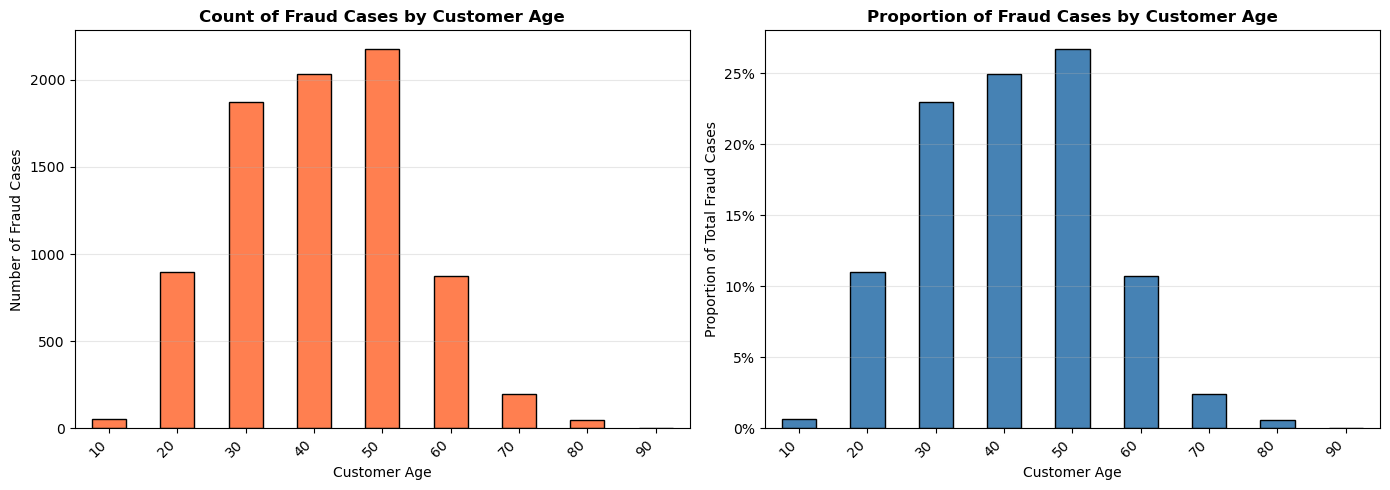


=== Fraud Cases Distribution by Customer age
 Customer age  Count  Proportion  Percentage
           10     52    0.006380        0.64
           20    896    0.109925       10.99
           30   1875    0.230033       23.00
           40   2032    0.249295       24.93
           50   2175    0.266838       26.68
           60    872    0.106981       10.70
           70    195    0.023923        2.39
           80     50    0.006134        0.61
           90      4    0.000491        0.05

=== Non-Fraud Cases Distribution by Customer Age
 Customer age  Count  Proportion  Percentage
           10  15839    0.020130        2.01
           20 198618    0.252426       25.24
           30 246236    0.312944       31.29
           40 180207    0.229027       22.90
           50 112502    0.142980       14.30
           60  27434    0.034866        3.49
           70   4983    0.006333        0.63
           80    963    0.001224        0.12
           90     56    0.000071        0.01


In [31]:
# Filter for fraud cases only (fraud_bool==1)
fraud_cases = dataset[dataset['fraud_bool'] == 1]
non_fraud_cases = dataset[dataset['fraud_bool'] == 0]
# Count fraud cases in each days_since_request_binned category
fraud_by_bin_customer_age = fraud_cases['customer_age'].value_counts().sort_index()
non_fraud_by_bin_customer_age = non_fraud_cases['customer_age'].value_counts().sort_index()
# Calculate proportions relative to total fraud cases
fraud_proportions_by_bin_of_customer_age = fraud_by_bin_customer_age / fraud_by_bin_customer_age.sum()
non_fraud_by_bin_of_customer_age_proportions = non_fraud_by_bin_customer_age / non_fraud_by_bin_customer_age.sum()
# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Count of fraud cases by bin
fraud_by_bin_customer_age.plot(kind='bar', ax=ax1, color='coral', edgecolor='black')
ax1.set_title('Count of Fraud Cases by Customer Age', fontsize=12, fontweight='bold')
ax1.set_xlabel('Customer Age')
ax1.set_ylabel('Number of Fraud Cases')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.grid(axis='y', alpha=0.3)

# Plot 2: Proportion of fraud cases by bin
fraud_proportions_by_bin_of_customer_age.plot(kind='bar', ax=ax2, color='steelblue', edgecolor='black')
ax2.set_title('Proportion of Fraud Cases by Customer Age', fontsize=12, fontweight='bold')
ax2.set_xlabel('Customer Age')
ax2.set_ylabel('Proportion of Total Fraud Cases')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()
# Print summary table
print("\n=== Fraud Cases Distribution by Customer age")
summary_df_fraud_by_customer_age = pd.DataFrame({
    'Customer age': fraud_by_bin_customer_age.index,
    'Count': fraud_by_bin_customer_age.values,
    'Proportion': fraud_proportions_by_bin_of_customer_age.values,
    'Percentage': (fraud_proportions_by_bin_of_customer_age.values * 100).round(2)
})
print(summary_df_fraud_by_customer_age.to_string(index=False))

# Print summary table
print("\n=== Non-Fraud Cases Distribution by Customer Age")
summary_df_non_fraud_by_customer_age = pd.DataFrame({
    'Customer age': non_fraud_by_bin_customer_age.index,
    'Count': non_fraud_by_bin_customer_age.values,
    'Proportion': non_fraud_by_bin_of_customer_age_proportions.values,
    'Percentage': (non_fraud_by_bin_of_customer_age_proportions.values * 100).round(2)
})      

print(summary_df_non_fraud_by_customer_age.to_string(index=False))

**Ages until 40"** are more chances to be non fraud while >40 tend to be more fraud. **Consider further binning** and target encoding

In [32]:
dataset["customer_age_binned"]=np.where(dataset["customer_age"]>40,">40 (More fraud)","<=40 (less fraud)")

In [33]:
dataset=dataset.drop(columns="customer_age",axis='columns')

### payment_type

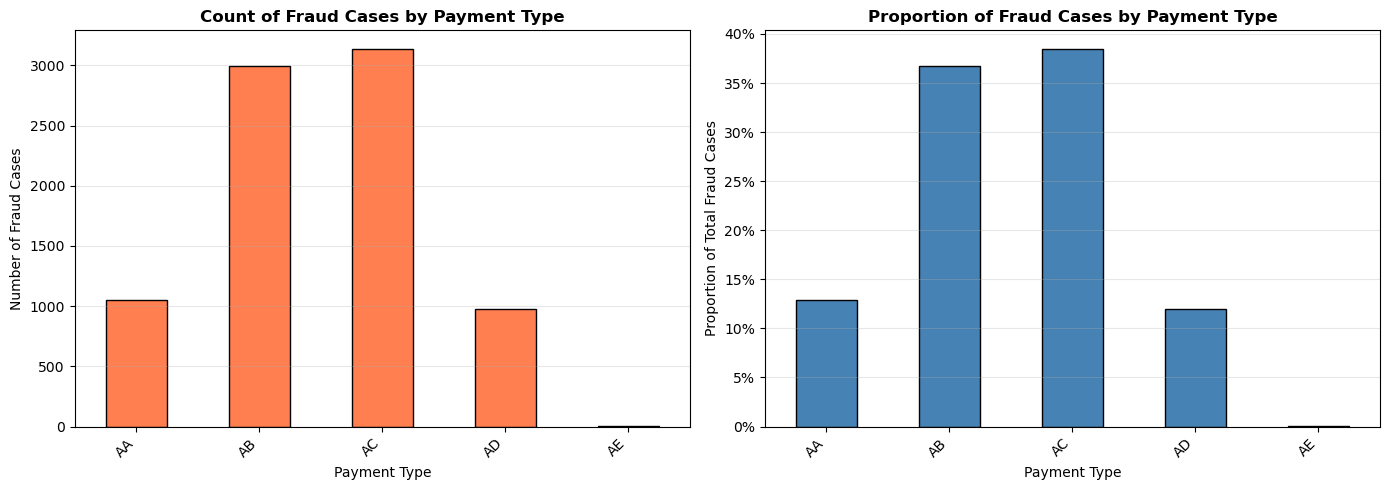


=== Fraud Cases Distribution by Payment Type ===
Payment Type  Count  Proportion  Percentage
          AA   1048    0.128573       12.86
          AB   2996    0.367562       36.76
          AC   3134    0.384493       38.45
          AD    972    0.119249       11.92
          AE      1    0.000123        0.01

=== Non-Fraud Cases Distribution by Payment Type ===
Payment Type  Count  Proportion  Percentage
          AA 207872    0.264187       26.42
          AB 285186    0.362446       36.24
          AC 195445    0.248393       24.84
          AD  98088    0.124661       12.47
          AE    247    0.000314        0.03


In [34]:
# Filter for fraud cases only (fraud_bool==1)
fraud_cases = dataset[dataset['fraud_bool'] == 1]
non_fraud_cases = dataset[dataset['fraud_bool'] == 0]
# Count fraud cases in each days_since_request_binned category
fraud_by_bin_payment_type = fraud_cases['payment_type'].value_counts().sort_index()
non_fraud_by_bin_payment_type = non_fraud_cases['payment_type'].value_counts().sort_index()
# Calculate proportions relative to total fraud cases
fraud_proportions_by_bin_of_payment_type = fraud_by_bin_payment_type / fraud_by_bin_payment_type.sum()
non_fraud_by_bin_of_payment_type_proportions = non_fraud_by_bin_payment_type / non_fraud_by_bin_payment_type.sum()
# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Count of fraud cases by bin
fraud_by_bin_payment_type.plot(kind='bar', ax=ax1, color='coral', edgecolor='black')
ax1.set_title('Count of Fraud Cases by Payment Type', fontsize=12, fontweight='bold')
ax1.set_xlabel('Payment Type')
ax1.set_ylabel('Number of Fraud Cases')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.grid(axis='y', alpha=0.3)

# Plot 2: Proportion of fraud cases by bin
fraud_proportions_by_bin_of_payment_type.plot(kind='bar', ax=ax2, color='steelblue', edgecolor='black')
ax2.set_title('Proportion of Fraud Cases by Payment Type', fontsize=12, fontweight='bold')
ax2.set_xlabel('Payment Type')
ax2.set_ylabel('Proportion of Total Fraud Cases')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary table
print("\n=== Fraud Cases Distribution by Payment Type ===")
summary_df_fraud_by_payment_type = pd.DataFrame({
    'Payment Type': fraud_by_bin_payment_type.index,
    'Count': fraud_by_bin_payment_type.values,
    'Proportion': fraud_proportions_by_bin_of_payment_type.values,
    'Percentage': (fraud_proportions_by_bin_of_payment_type.values * 100).round(2)
})
print(summary_df_fraud_by_payment_type.to_string(index=False))

# Print summary table
print("\n=== Non-Fraud Cases Distribution by Payment Type ===")
summary_df_non_fraud_by_payment_type = pd.DataFrame({
    'Payment Type': non_fraud_by_bin_payment_type.index,
    'Count': non_fraud_by_bin_payment_type.values,
    'Proportion': non_fraud_by_bin_of_payment_type_proportions.values,
    'Percentage': (non_fraud_by_bin_of_payment_type_proportions.values * 100).round(2)
})      

print(summary_df_non_fraud_by_payment_type.to_string(index=False))

**Slight** difference in AA, AC Cases since in AA type the fraud detection rate seems to be half of non-fraud corresponding rate and vice versa of AC. The remaining cases are having same influence ==> need to aggregate the cases in other categories.

In [35]:
# We want to create payment_type_engineered including only classes of AA, AC and all other ones to be grouped as 'Other'
dataset["payment_type_engineered"]=np.where(~dataset["payment_type"].isin(['AA', 'AC']),"Other",dataset["payment_type"])

In [36]:
dataset=dataset.drop(columns="payment_type",axis='columns')

### employment_status

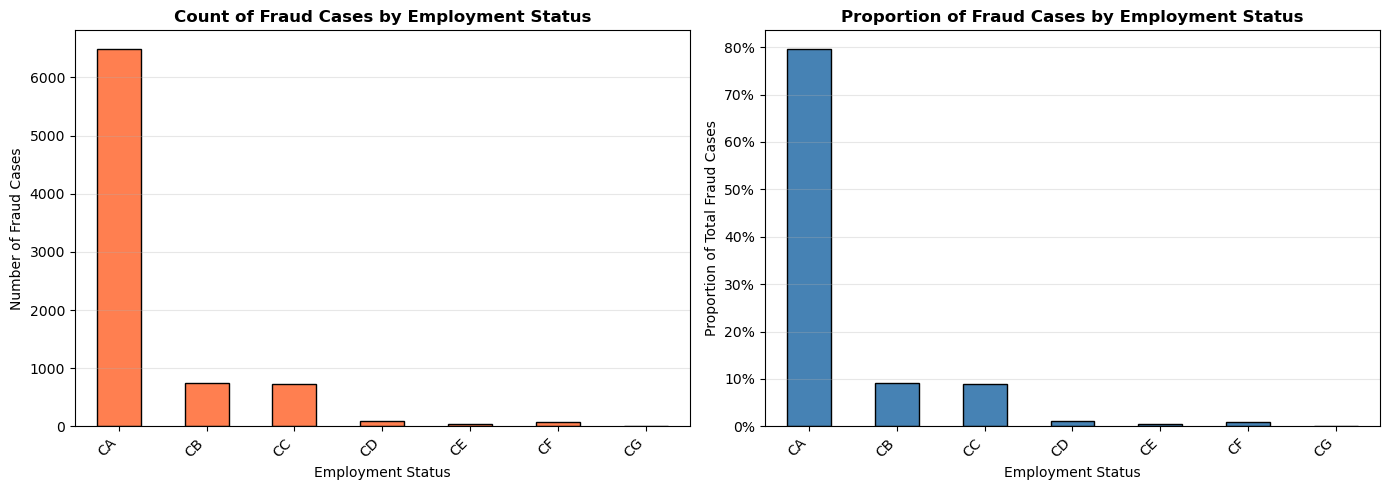


=== Fraud Cases Distribution by Employment Status ===
Employment Status  Count  Proportion  Percentage
               CA   6486    0.795731       79.57
               CB    737    0.090418        9.04
               CC    730    0.089560        8.96
               CD     87    0.010674        1.07
               CE     38    0.004662        0.47
               CF     68    0.008343        0.83
               CG      5    0.000613        0.06

=== Non-Fraud Cases Distribution by Employment Status ===
Employment Status  Count  Proportion  Percentage
               CA 565057    0.718136       71.81
               CB 114713    0.145790       14.58
               CC  30517    0.038784        3.88
               CD  21918    0.027856        2.79
               CE  18105    0.023010        2.30
               CF  36161    0.045957        4.60
               CG    367    0.000466        0.05


In [37]:
# Count fraud cases in each days_since_request_binned category
fraud_by_bin_employment_status = fraud_cases['employment_status'].value_counts().sort_index()
non_fraud_by_bin_employment_status = non_fraud_cases['employment_status'].value_counts().sort_index()
# Calculate proportions relative to total fraud cases
fraud_proportions_by_bin_of_employment_status = fraud_by_bin_employment_status / fraud_by_bin_employment_status.sum()
non_fraud_by_bin_of_employment_status_proportions = non_fraud_by_bin_employment_status / non_fraud_by_bin_employment_status.sum()
# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Count of fraud cases by bin
fraud_by_bin_employment_status.plot(kind='bar', ax=ax1, color='coral', edgecolor='black')
ax1.set_title('Count of Fraud Cases by Employment Status', fontsize=12, fontweight='bold')
ax1.set_xlabel('Employment Status')
ax1.set_ylabel('Number of Fraud Cases')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.grid(axis='y', alpha=0.3)

# Plot 2: Proportion of fraud cases by bin
fraud_proportions_by_bin_of_employment_status.plot(kind='bar', ax=ax2, color='steelblue', edgecolor='black')
ax2.set_title('Proportion of Fraud Cases by Employment Status', fontsize=12, fontweight='bold')
ax2.set_xlabel('Employment Status')
ax2.set_ylabel('Proportion of Total Fraud Cases')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary table
print("\n=== Fraud Cases Distribution by Employment Status ===")
summary_df_fraud_by_employment_status = pd.DataFrame({
    'Employment Status': fraud_by_bin_employment_status.index,
    'Count': fraud_by_bin_employment_status.values,
    'Proportion': fraud_proportions_by_bin_of_employment_status.values,
    'Percentage': (fraud_proportions_by_bin_of_employment_status.values * 100).round(2)
})
print(summary_df_fraud_by_employment_status.to_string(index=False))

# Print summary table
print("\n=== Non-Fraud Cases Distribution by Employment Status ===")
summary_df_non_fraud_by_employment_status = pd.DataFrame({
    'Employment Status': non_fraud_by_bin_employment_status.index,
    'Count': non_fraud_by_bin_employment_status.values,
    'Proportion': non_fraud_by_bin_of_employment_status_proportions.values,
    'Percentage': (non_fraud_by_bin_of_employment_status_proportions.values * 100).round(2)
})      

print(summary_df_non_fraud_by_employment_status.to_string(index=False))


In [38]:

# Visualise through stacked barchart the relative proportions of fraud (1 or 0) per employment_status. In essence, we want to see how the cases of fraud are distributed (in terms of proportins) per class and how the non-fraud cases are distributed per class.
employment_status_counts_fraud = dataset.loc[dataset['fraud_bool'] == 1].shape[0]
employment_status_counts_non_fraud = dataset.loc[dataset['fraud_bool'] == 0].shape[0]
fraud_counts = dataset[dataset['fraud_bool'] == 1]['employment_status'].value_counts()
non_fraud_counts = dataset[dataset['fraud_bool'] == 0]['employment_status'].value_counts()  
fraud_proportions = fraud_counts / employment_status_counts_fraud
non_fraud_proportions = non_fraud_counts / employment_status_counts_non_fraud
proportions_df = pd.DataFrame({
    'Fraud': fraud_proportions,
    'Non-Fraud': non_fraud_proportions
}).fillna(0)


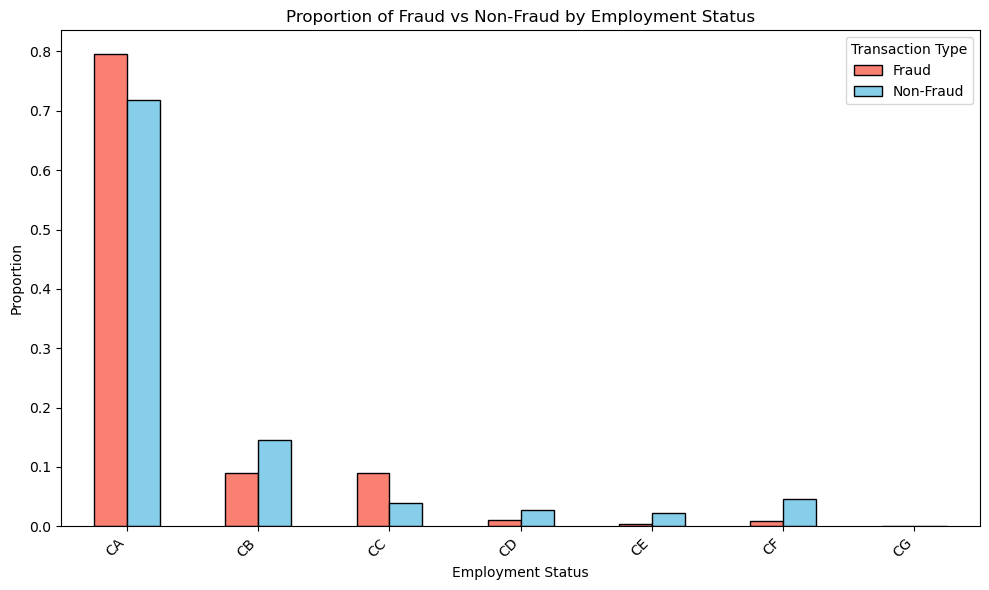

In [39]:
# Now plot the stacked bar chart the proportions_df
proportions_df.plot(kind='bar', stacked=False, figsize=(10, 6), color=['salmon', 'skyblue'], edgecolor='black')
plt.title('Proportion of Fraud vs Non-Fraud by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transaction Type', loc='upper right', labels=['Fraud', 'Non-Fraud'])
plt.tight_layout()
plt.show()

Apart from class **CG**, in the other ones the proportion of fraud vs non fraud differentiates=> indication that this is **strong factor**. We can combine classes together since they have similar behavior and in parallel increase the sample size 

In [40]:
# We want to create payment_type_engineered including only classes of AA, AC and all other ones to be grouped as 'Other'
dataset['employment_status_engineered']=np.where(~dataset["employment_status"].isin(['CA', 'CB','CC']),'CD_CE_CF_CG',dataset["employment_status"])

In [41]:
dataset=dataset.drop(columns="employment_status",axis='columns')

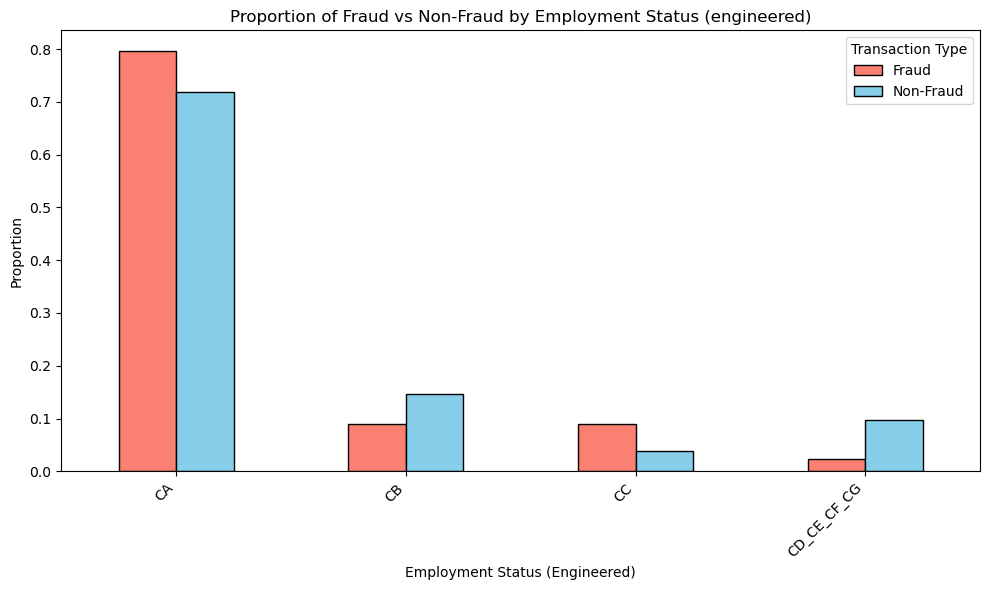

In [42]:
fraud_counts = dataset[dataset['fraud_bool'] == 1]['employment_status_engineered'].value_counts()
non_fraud_counts = dataset[dataset['fraud_bool'] == 0]['employment_status_engineered'].value_counts()  
fraud_proportions = fraud_counts / employment_status_counts_fraud
non_fraud_proportions = non_fraud_counts / employment_status_counts_non_fraud
proportions_df = pd.DataFrame({
    'Fraud': fraud_proportions,
    'Non-Fraud': non_fraud_proportions
}).fillna(0)
# Now plot the stacked bar chart the proportions_df
proportions_df.plot(kind='bar', stacked=False, figsize=(10, 6), color=['salmon', 'skyblue'], edgecolor='black')
plt.title('Proportion of Fraud vs Non-Fraud by Employment Status (engineered)')
plt.xlabel('Employment Status (Engineered)')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transaction Type', loc='upper right', labels=['Fraud', 'Non-Fraud'])
plt.tight_layout()
plt.show()

### email_is_free

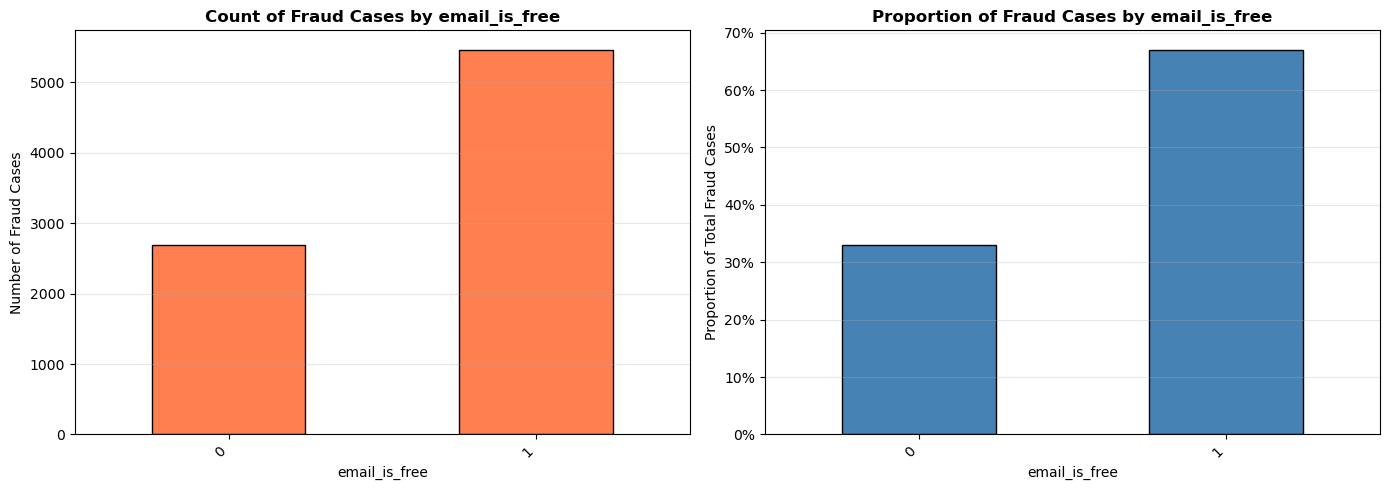


=== Fraud Cases Distribution by email_is_free ===
 email_is_free  Count  Proportion  Percentage
             0   2685    0.329407       32.94
             1   5466    0.670593       67.06

=== Non-Fraud Cases Distribution by email_is_free ===
 email_is_free  Count  Proportion  Percentage
             0 361461    0.459384       45.94
             1 425377    0.540616       54.06


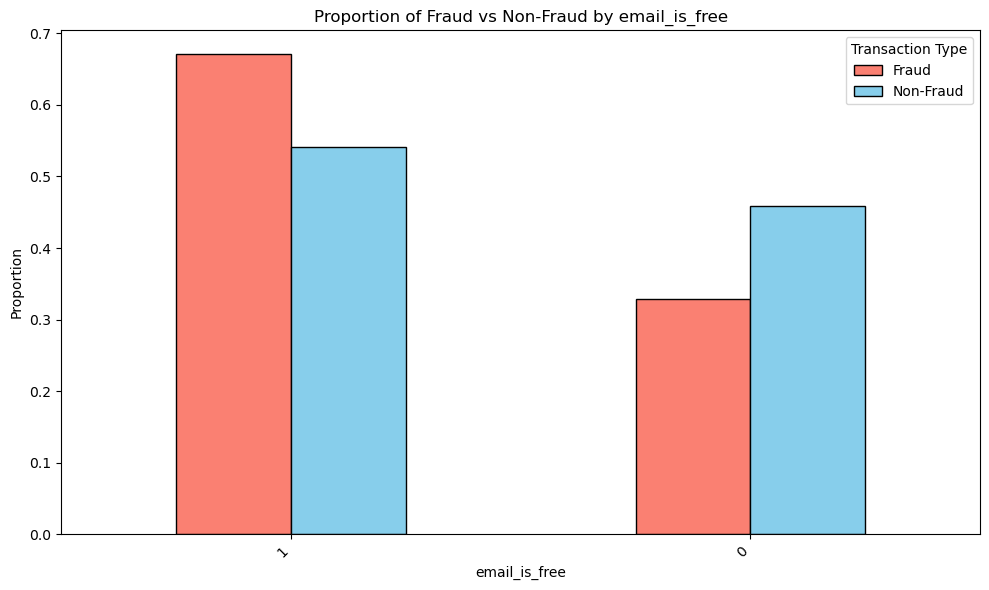

In [43]:

# Count fraud cases in each days_since_request_binned category
fraud_by_bin_email_is_free = fraud_cases['email_is_free'].value_counts().sort_index()
non_fraud_by_bin_email_is_free = non_fraud_cases['email_is_free'].value_counts().sort_index()
# Calculate proportions relative to total fraud cases
fraud_proportions_by_bin_of_email_is_free = fraud_by_bin_email_is_free / fraud_by_bin_email_is_free.sum()
non_fraud_by_bin_of_email_is_free_proportions = non_fraud_by_bin_email_is_free / non_fraud_by_bin_email_is_free.sum()
# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Count of fraud cases by bin
fraud_by_bin_email_is_free.plot(kind='bar', ax=ax1, color='coral', edgecolor='black')
ax1.set_title('Count of Fraud Cases by email_is_free', fontsize=12, fontweight='bold')
ax1.set_xlabel('email_is_free')
ax1.set_ylabel('Number of Fraud Cases')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.grid(axis='y', alpha=0.3)

# Plot 2: Proportion of fraud cases by bin
fraud_proportions_by_bin_of_email_is_free.plot(kind='bar', ax=ax2, color='steelblue', edgecolor='black')
ax2.set_title('Proportion of Fraud Cases by email_is_free', fontsize=12, fontweight='bold')
ax2.set_xlabel('email_is_free')
ax2.set_ylabel('Proportion of Total Fraud Cases')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary table
print("\n=== Fraud Cases Distribution by email_is_free ===")
summary_df_fraud_by_email_is_free = pd.DataFrame({
    'email_is_free': fraud_by_bin_email_is_free.index,
    'Count': fraud_by_bin_email_is_free.values,
    'Proportion': fraud_proportions_by_bin_of_email_is_free.values,
    'Percentage': (fraud_proportions_by_bin_of_email_is_free.values * 100).round(2)
})
print(summary_df_fraud_by_email_is_free.to_string(index=False))

# Print summary table
print("\n=== Non-Fraud Cases Distribution by email_is_free ===")
summary_df_non_fraud_by_email_is_free = pd.DataFrame({
    'email_is_free': non_fraud_by_bin_email_is_free.index,
    'Count': non_fraud_by_bin_email_is_free.values,
    'Proportion': non_fraud_by_bin_of_email_is_free_proportions.values,
    'Percentage': (non_fraud_by_bin_of_email_is_free_proportions.values * 100).round(2)
})      

print(summary_df_non_fraud_by_email_is_free.to_string(index=False))
# Visualise through stacked barchart the relative proportions of fraud (1 or 0) per email_is_free. In essence, we want to see how the cases of fraud are distributed (in terms of proportins) per class and how the non-fraud cases are distributed per class.
email_is_free_counts_fraud = dataset.loc[dataset['fraud_bool'] == 1].shape[0]
email_is_free_counts_non_fraud = dataset.loc[dataset['fraud_bool'] == 0].shape[0]
fraud_counts = dataset[dataset['fraud_bool'] == 1]['email_is_free'].value_counts()
non_fraud_counts = dataset[dataset['fraud_bool'] == 0]['email_is_free'].value_counts()  
fraud_proportions = fraud_counts / email_is_free_counts_fraud
non_fraud_proportions = non_fraud_counts / email_is_free_counts_non_fraud
proportions_df = pd.DataFrame({
    'Fraud': fraud_proportions,
    'Non-Fraud': non_fraud_proportions
}).fillna(0)
# Now plot the stacked bar chart the proportions_df
proportions_df.plot(kind='bar', stacked=False, figsize=(10, 6), color=['salmon', 'skyblue'], edgecolor='black')
plt.title('Proportion of Fraud vs Non-Fraud by email_is_free')
plt.xlabel('email_is_free')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transaction Type', loc='upper right', labels=['Fraud', 'Non-Fraud'])
plt.tight_layout()
plt.show()

**Inference** The users with paid e-mails tend to be more credible customers (non fraud cases). **Strong association** between fraud users and free e-mails.

### housing_status

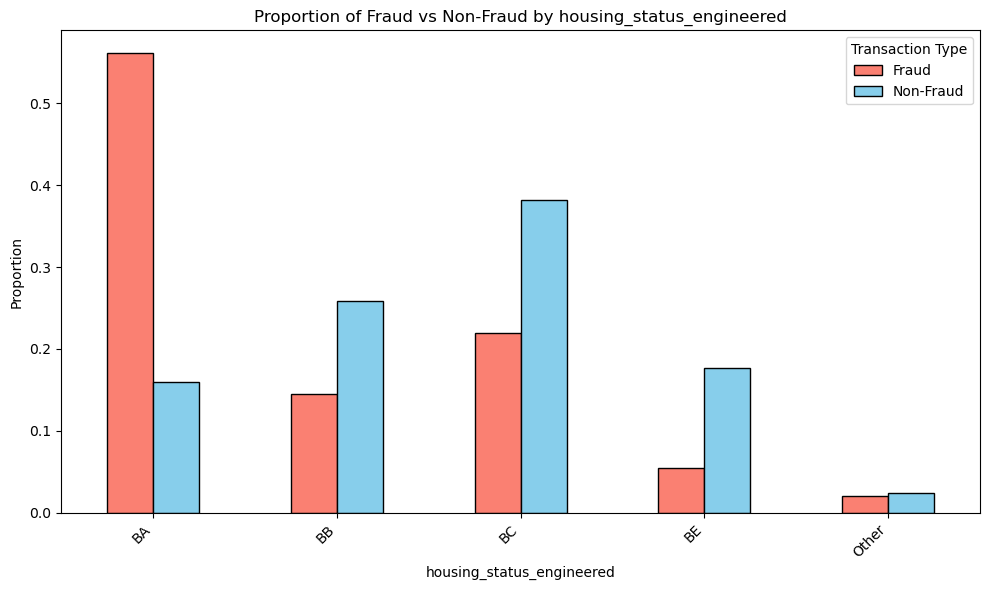


=== Fraud Cases Distribution by housing_status_engineered ===
housing_status_engineered  Count  Proportion  Percentage
                       BA   4571    0.560790       56.08
                       BC   1793    0.219973       22.00
                       BB   1180    0.144768       14.48
                       BE    444    0.054472        5.45
                    Other    163    0.019998        2.00

=== Non-Fraud Cases Distribution by housing_status_engineered ===
housing_status_engineered  Count  Proportion  Percentage
                       BC 300086    0.381382       38.14
                       BB 203410    0.258516       25.85
                       BE 138765    0.176358       17.64
                       BA 125204    0.159123       15.91
                    Other  19373    0.024621        2.46


In [44]:
housing_status_engineered_counts_fraud = dataset.loc[dataset['fraud_bool'] == 1].shape[0]
housing_status_engineered_counts_non_fraud = dataset.loc[dataset['fraud_bool'] == 0].shape[0]
fraud_counts = dataset[dataset['fraud_bool'] == 1]['housing_status_engineered'].value_counts()
non_fraud_counts = dataset[dataset['fraud_bool'] == 0]['housing_status_engineered'].value_counts()  
fraud_proportions = fraud_counts / housing_status_engineered_counts_fraud
non_fraud_proportions = non_fraud_counts / housing_status_engineered_counts_non_fraud
proportions_df = pd.DataFrame({
    'Fraud': fraud_proportions,
    'Non-Fraud': non_fraud_proportions
}).fillna(0)
# Now plot the stacked bar chart the proportions_df
proportions_df.plot(kind='bar', stacked=False, figsize=(10, 6), color=['salmon', 'skyblue'], edgecolor='black')
plt.title('Proportion of Fraud vs Non-Fraud by housing_status_engineered')
plt.xlabel('housing_status_engineered')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transaction Type', loc='upper right', labels=['Fraud', 'Non-Fraud'])
plt.tight_layout()
plt.show()
# Table with results
# Print summary table
print("\n=== Fraud Cases Distribution by housing_status_engineered ===")
summary_df_fraud_by_housing_status = pd.DataFrame({
    'housing_status_engineered': fraud_counts.index,
    'Count': fraud_counts.values,
    'Proportion': fraud_proportions.values,
    'Percentage': (fraud_proportions.values * 100).round(2)
})  
print(summary_df_fraud_by_housing_status.to_string(index=False))

# Print summary table
print("\n=== Non-Fraud Cases Distribution by housing_status_engineered ===")
summary_df_non_fraud_by_housing_status = pd.DataFrame({
    'housing_status_engineered': non_fraud_counts.index,
    'Count': non_fraud_counts.values,
    'Proportion': non_fraud_proportions.values,
    'Percentage': (non_fraud_proportions.values * 100).round(2)
})      

print(summary_df_non_fraud_by_housing_status.to_string(index=False))

**Strong association** between housing status (after further binning) with fraud detection.

In [45]:
dataset=dataset.drop(columns="housing_status",axis='columns')

### foreign_request

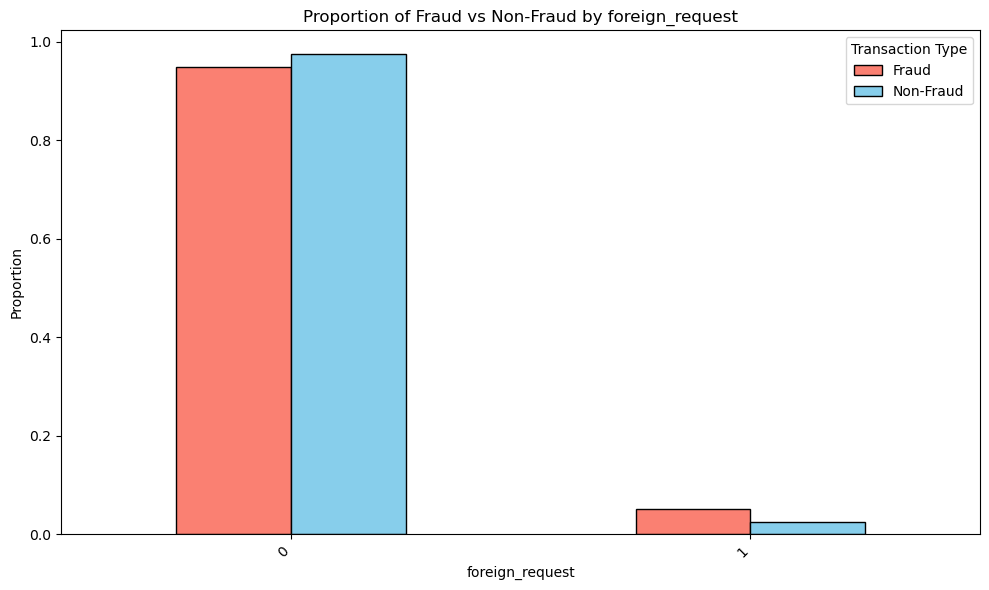


=== Fraud Cases Distribution by foreign_request ===
 foreign_request  Count  Proportion  Percentage
               0   7737    0.949209       94.92
               1    414    0.050791        5.08

=== Non-Fraud Cases Distribution by foreign_request ===
 foreign_request  Count  Proportion  Percentage
               0 766589    0.974265       97.43
               1  20249    0.025735        2.57


In [46]:
foreign_request_counts_fraud = dataset.loc[dataset['fraud_bool'] == 1].shape[0]
foreign_request_counts_non_fraud = dataset.loc[dataset['fraud_bool'] == 0].shape[0]
fraud_counts = dataset[dataset['fraud_bool'] == 1]['foreign_request'].value_counts()
non_fraud_counts = dataset[dataset['fraud_bool'] == 0]['foreign_request'].value_counts()  
fraud_proportions = fraud_counts / foreign_request_counts_fraud
non_fraud_proportions = non_fraud_counts / foreign_request_counts_non_fraud
proportions_df = pd.DataFrame({
    'Fraud': fraud_proportions,
    'Non-Fraud': non_fraud_proportions
}).fillna(0)
# Now plot the stacked bar chart the proportions_df
proportions_df.plot(kind='bar', stacked=False, figsize=(10, 6), color=['salmon', 'skyblue'], edgecolor='black')
plt.title('Proportion of Fraud vs Non-Fraud by foreign_request')
plt.xlabel('foreign_request')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transaction Type', loc='upper right', labels=['Fraud', 'Non-Fraud'])
plt.tight_layout()
plt.show()
# Table with results
# Print summary table
print("\n=== Fraud Cases Distribution by foreign_request ===")
summary_df_fraud_by_foreign_request = pd.DataFrame({
    'foreign_request': fraud_counts.index,
    'Count': fraud_counts.values,
    'Proportion': fraud_proportions.values,
    'Percentage': (fraud_proportions.values * 100).round(2)
})  
print(summary_df_fraud_by_foreign_request.to_string(index=False))

# Print summary table
print("\n=== Non-Fraud Cases Distribution by foreign_request ===")
summary_df_non_fraud_by_foreign_request = pd.DataFrame({
    'foreign_request': non_fraud_counts.index,
    'Count': non_fraud_counts.values,
    'Proportion': non_fraud_proportions.values,
    'Percentage': (non_fraud_proportions.values * 100).round(2)
})      

print(summary_df_non_fraud_by_foreign_request.to_string(index=False))

**Little significant** association by the means that the foreign requests may tend to be little more fraud than non foreign ones.

### Phone_home_valid, phone_mobile_valid and their_interaction

In [47]:
dataset['phone_home_and_mobile_valid'].value_counts()

phone_home_and_mobile_valid
Invalid_Valid      454299
Valid_Valid        249371
Valid_Invalid       72470
Invalid_Invalid     18849
Name: count, dtype: int64

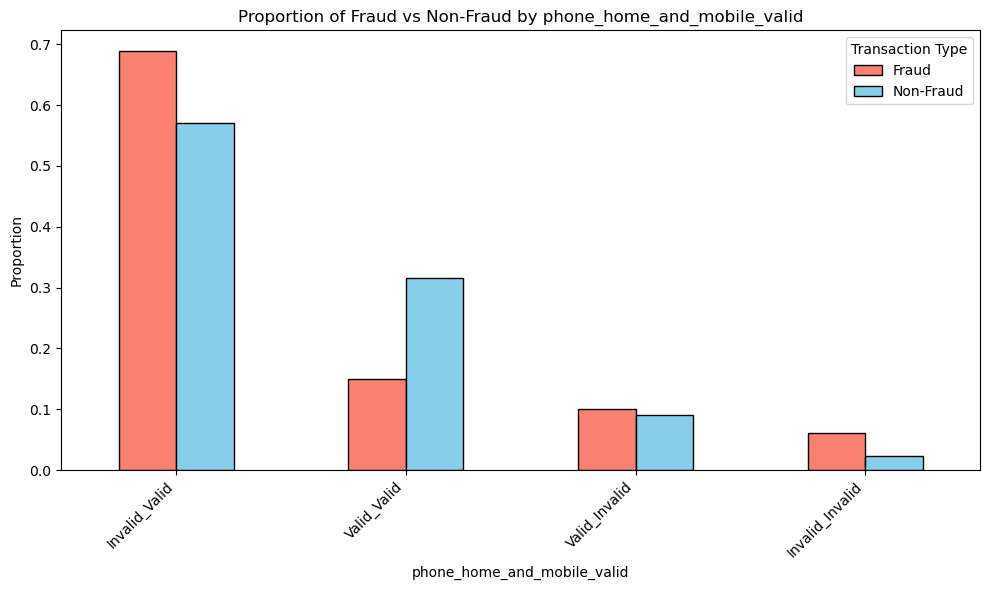


=== Fraud Cases Distribution by phone_home_and_mobile_valid
phone_home_and_mobile_valid  Count  Proportion  Percentage
              Invalid_Valid   5610    0.688259       68.83
                Valid_Valid   1221    0.149798       14.98
              Valid_Invalid    825    0.101215       10.12
            Invalid_Invalid    495    0.060729        6.07

=== Non-Fraud Cases Distribution by phone_home_and_mobile_valid
phone_home_and_mobile_valid  Count  Proportion  Percentage
              Invalid_Valid 448689    0.570243       57.02
                Valid_Valid 248150    0.315376       31.54
              Valid_Invalid  71645    0.091054        9.11
            Invalid_Invalid  18354    0.023326        2.33


In [48]:
phone_home_mobile_valid_counts_fraud = dataset.loc[dataset['fraud_bool'] == 1].shape[0]
phone_home_mobile_valid_counts_non_fraud = dataset.loc[dataset['fraud_bool'] == 0].shape[0]
fraud_counts = dataset[dataset['fraud_bool'] == 1]['phone_home_and_mobile_valid'].value_counts()
non_fraud_counts = dataset[dataset['fraud_bool'] == 0]['phone_home_and_mobile_valid'].value_counts()  
fraud_proportions = fraud_counts / phone_home_mobile_valid_counts_fraud
non_fraud_proportions = non_fraud_counts / phone_home_mobile_valid_counts_non_fraud
proportions_df = pd.DataFrame({
    'Fraud': fraud_proportions,
    'Non-Fraud': non_fraud_proportions
}).fillna(0)
# Now plot the stacked bar chart the proportions_df
proportions_df.plot(kind='bar', stacked=False, figsize=(10, 6), color=['salmon', 'skyblue'], edgecolor='black')
plt.title('Proportion of Fraud vs Non-Fraud by phone_home_and_mobile_valid')
plt.xlabel('phone_home_and_mobile_valid')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transaction Type', loc='upper right', labels=['Fraud', 'Non-Fraud'])
plt.tight_layout()
plt.show()
# Table with results
# Print summary table
print("\n=== Fraud Cases Distribution by phone_home_and_mobile_valid")
summary_df_fraud_by_phone_home_mobile_valid = pd.DataFrame({
    'phone_home_and_mobile_valid': fraud_counts.index,
    'Count': fraud_counts.values,
    'Proportion': fraud_proportions.values,
    'Percentage': (fraud_proportions.values * 100).round(2)
})  
print(summary_df_fraud_by_phone_home_mobile_valid.to_string(index=False))

# Print summary table
print("\n=== Non-Fraud Cases Distribution by phone_home_and_mobile_valid")
summary_df_non_fraud_by_phone_home_mobile_valid = pd.DataFrame({
    'phone_home_and_mobile_valid': non_fraud_counts.index,
    'Count': non_fraud_counts.values,
    'Proportion': non_fraud_proportions.values,
    'Percentage': (non_fraud_proportions.values * 100).round(2)
})      

print(summary_df_non_fraud_by_phone_home_mobile_valid.to_string(index=False))

**Inference**: All cases with either/both invalid home or/and mobile are showing favoritism to fraud. **Important factor**.

### proposed_credit_limit_binned

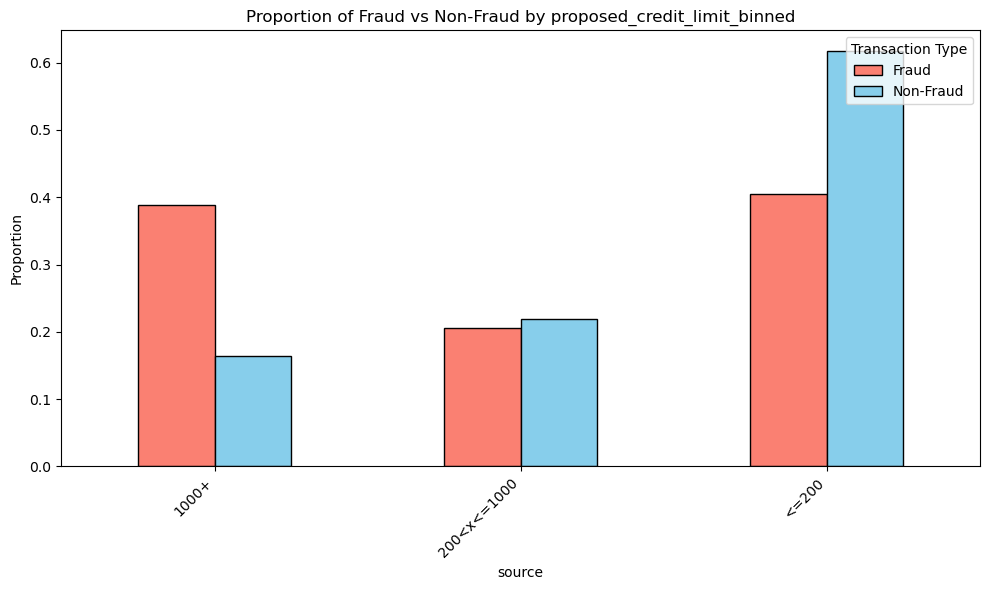


=== Fraud Cases Distribution by proposed_credit_limit_binned
     source  Count  Proportion  Percentage
      <=200   3305    0.405472       40.55
      1000+   3168    0.388664       38.87
200<x<=1000   1678    0.205864       20.59

=== Non-Fraud Cases Distribution by proposed_credit_limit_binned
     source  Count  Proportion  Percentage
      <=200 485706    0.617288       61.73
200<x<=1000 172131    0.218763       21.88
      1000+ 129001    0.163949       16.39


In [49]:
proposed_credit_limit_binned_fraud = dataset.loc[dataset['fraud_bool'] == 1].shape[0]
proposed_credit_limit_binned_non_fraud = dataset.loc[dataset['fraud_bool'] == 0].shape[0]
fraud_counts = dataset[dataset['fraud_bool'] == 1]['proposed_credit_limit_binned'].value_counts()
non_fraud_counts = dataset[dataset['fraud_bool'] == 0]['proposed_credit_limit_binned'].value_counts()  
fraud_proportions = fraud_counts / proposed_credit_limit_binned_fraud
non_fraud_proportions = non_fraud_counts / proposed_credit_limit_binned_non_fraud
proportions_df = pd.DataFrame({
    'Fraud': fraud_proportions,
    'Non-Fraud': non_fraud_proportions
}).fillna(0)
# Now plot the stacked bar chart the proportions_df
proportions_df.plot(kind='bar', stacked=False, figsize=(10, 6), color=['salmon', 'skyblue'], edgecolor='black')
plt.title('Proportion of Fraud vs Non-Fraud by proposed_credit_limit_binned')
plt.xlabel('source')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transaction Type', loc='upper right', labels=['Fraud', 'Non-Fraud'])
plt.tight_layout()
plt.show()
# Table with results
# Print summary table
print("\n=== Fraud Cases Distribution by proposed_credit_limit_binned")
summary_df_fraud_by_proposed_credit_limit_binned = pd.DataFrame({
    'source': fraud_counts.index,
    'Count': fraud_counts.values,
    'Proportion': fraud_proportions.values,
    'Percentage': (fraud_proportions.values * 100).round(2)
})  
print(summary_df_fraud_by_proposed_credit_limit_binned.to_string(index=False))

# Print summary table
print("\n=== Non-Fraud Cases Distribution by proposed_credit_limit_binned")
summary_df_non_fraud_by_proposed_credit_limit_binned = pd.DataFrame({
    'source': non_fraud_counts.index,
    'Count': non_fraud_counts.values,
    'Proportion': non_fraud_proportions.values,
    'Percentage': (non_fraud_proportions.values * 100).round(2)
})      

print(summary_df_non_fraud_by_proposed_credit_limit_binned.to_string(index=False))

**stong association** by the means of that when the proposed limit is high (>1000), more chances to be fraud.

### source

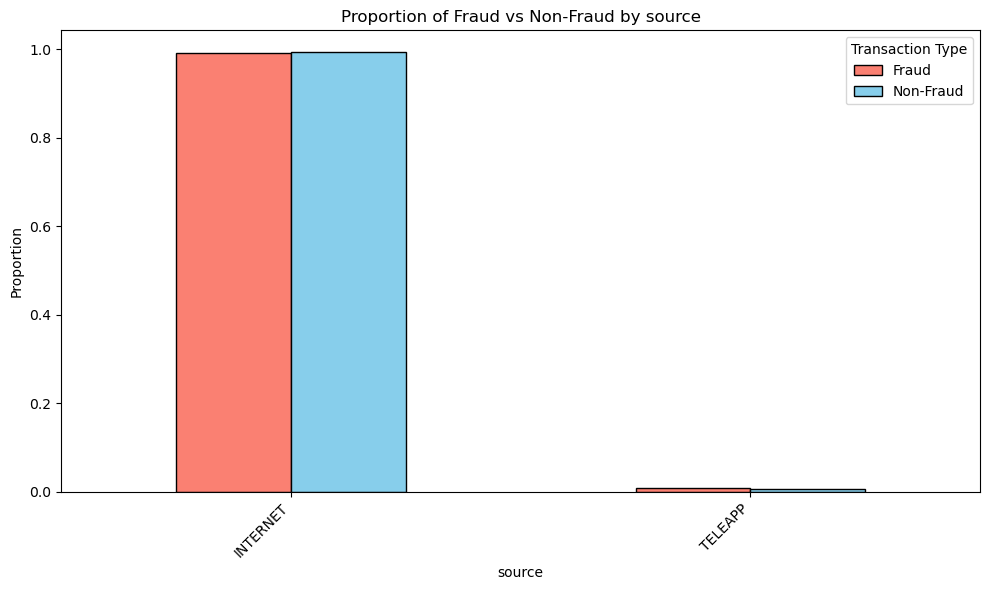


=== Fraud Cases Distribution by source ===
  source  Count  Proportion  Percentage
INTERNET   8071    0.990185       99.02
 TELEAPP     80    0.009815        0.98

=== Non-Fraud Cases Distribution by source ===
  source  Count  Proportion  Percentage
INTERNET 781181     0.99281       99.28
 TELEAPP   5657     0.00719        0.72


In [50]:
source_counts_fraud = dataset.loc[dataset['fraud_bool'] == 1].shape[0]
source_counts_non_fraud = dataset.loc[dataset['fraud_bool'] == 0].shape[0]
fraud_counts = dataset[dataset['fraud_bool'] == 1]['source'].value_counts()
non_fraud_counts = dataset[dataset['fraud_bool'] == 0]['source'].value_counts()  
fraud_proportions = fraud_counts / source_counts_fraud
non_fraud_proportions = non_fraud_counts / source_counts_non_fraud
proportions_df = pd.DataFrame({
    'Fraud': fraud_proportions,
    'Non-Fraud': non_fraud_proportions
}).fillna(0)
# Now plot the stacked bar chart the proportions_df
proportions_df.plot(kind='bar', stacked=False, figsize=(10, 6), color=['salmon', 'skyblue'], edgecolor='black')
plt.title('Proportion of Fraud vs Non-Fraud by source')
plt.xlabel('source')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transaction Type', loc='upper right', labels=['Fraud', 'Non-Fraud'])
plt.tight_layout()
plt.show()
# Table with results
# Print summary table
print("\n=== Fraud Cases Distribution by source ===")
summary_df_fraud_by_source = pd.DataFrame({
    'source': fraud_counts.index,
    'Count': fraud_counts.values,
    'Proportion': fraud_proportions.values,
    'Percentage': (fraud_proportions.values * 100).round(2)
})  
print(summary_df_fraud_by_source.to_string(index=False))

# Print summary table
print("\n=== Non-Fraud Cases Distribution by source ===")
summary_df_non_fraud_by_source = pd.DataFrame({
    'source': non_fraud_counts.index,
    'Count': non_fraud_counts.values,
    'Proportion': non_fraud_proportions.values,
    'Percentage': (non_fraud_proportions.values * 100).round(2)
})      

print(summary_df_non_fraud_by_source.to_string(index=False))

**Not important factor the source**

In [51]:
dataset=dataset.drop(columns="source",axis='columns')

### device_os

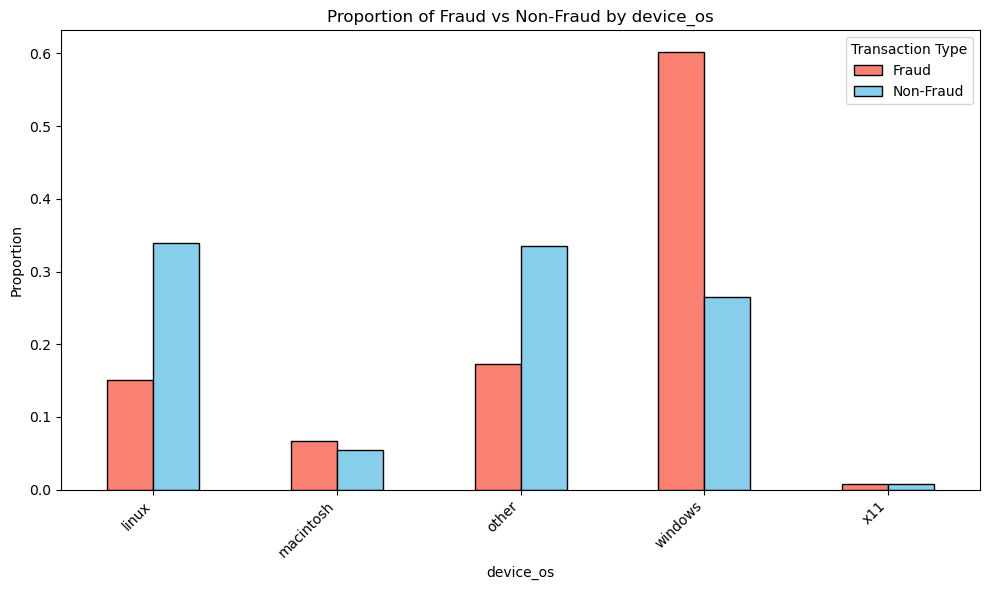


=== Fraud Cases Distribution by device_os ===
device_os  Count  Proportion  Percentage
  windows   4905    0.601767       60.18
    other   1406    0.172494       17.25
    linux   1234    0.151392       15.14
macintosh    544    0.066740        6.67
      x11     62    0.007606        0.76

=== Non-Fraud Cases Distribution by device_os ===
device_os  Count  Proportion  Percentage
    linux 266446    0.338629       33.86
    other 264021    0.335547       33.55
  windows 208020    0.264375       26.44
macintosh  42467    0.053972        5.40
      x11   5884    0.007478        0.75


In [52]:
device_os_counts_fraud = dataset.loc[dataset['fraud_bool'] == 1].shape[0]
device_os_counts_non_fraud = dataset.loc[dataset['fraud_bool'] == 0].shape[0]
fraud_counts = dataset[dataset['fraud_bool'] == 1]['device_os'].value_counts()
non_fraud_counts = dataset[dataset['fraud_bool'] == 0]['device_os'].value_counts()  
fraud_proportions = fraud_counts / device_os_counts_fraud
non_fraud_proportions = non_fraud_counts / device_os_counts_non_fraud
proportions_df = pd.DataFrame({
    'Fraud': fraud_proportions,
    'Non-Fraud': non_fraud_proportions
}).fillna(0)
# Now plot the stacked bar chart the proportions_df
proportions_df.plot(kind='bar', stacked=False, figsize=(10, 6), color=['salmon', 'skyblue'], edgecolor='black')
plt.title('Proportion of Fraud vs Non-Fraud by device_os')
plt.xlabel('device_os')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transaction Type', loc='upper right', labels=['Fraud', 'Non-Fraud'])
plt.tight_layout()
plt.show()
# Table with results
# Print summary table
print("\n=== Fraud Cases Distribution by device_os ===")
summary_df_fraud_by_device_os = pd.DataFrame({
    'device_os': fraud_counts.index,
    'Count': fraud_counts.values,
    'Proportion': fraud_proportions.values,
    'Percentage': (fraud_proportions.values * 100).round(2)
})  
print(summary_df_fraud_by_device_os.to_string(index=False))

# Print summary table
print("\n=== Non-Fraud Cases Distribution by device_os ===")
summary_df_non_fraud_by_device_os = pd.DataFrame({
    'device_os': non_fraud_counts.index,
    'Count': non_fraud_counts.values,
    'Proportion': non_fraud_proportions.values,
    'Percentage': (non_fraud_proportions.values * 100).round(2)
})      

print(summary_df_non_fraud_by_device_os.to_string(index=False))

**Inference** Fraud users tend to use more windows than non fraud while linux users tend to have less fraud which may be due to the closed-source of linux, macintosh.

### keep_alive_session

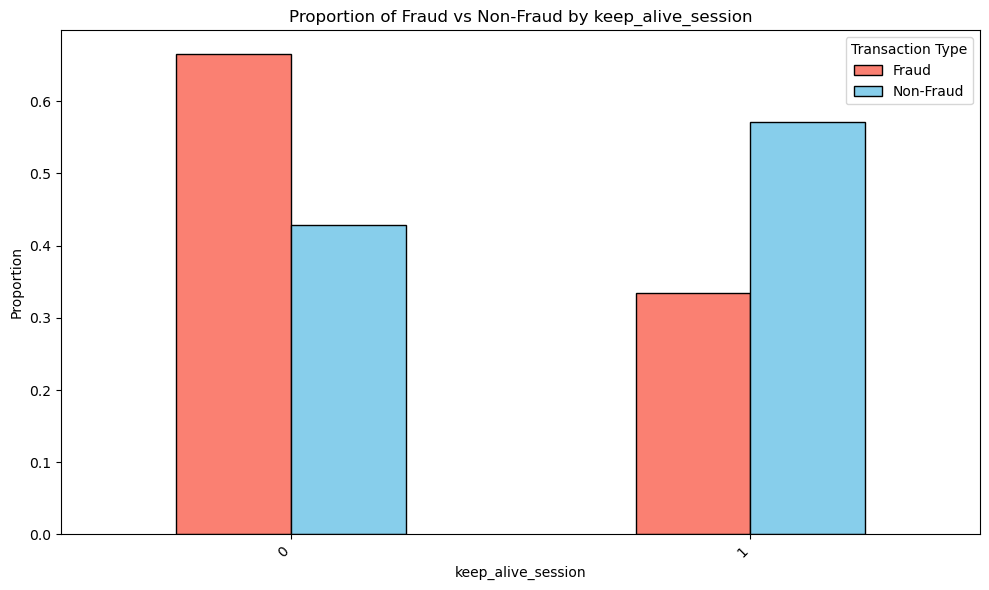


=== Fraud Cases Distribution by keep_alive_session ===
 keep_alive_session  Count  Proportion  Percentage
                  0   5421    0.665072       66.51
                  1   2730    0.334928       33.49

=== Non-Fraud Cases Distribution by keep_alive_session ===
 keep_alive_session  Count  Proportion  Percentage
                  1 449688    0.571513       57.15
                  0 337150    0.428487       42.85


In [53]:
keep_alive_session_counts_fraud = dataset.loc[dataset['fraud_bool'] == 1].shape[0]
keep_alive_session_counts_non_fraud = dataset.loc[dataset['fraud_bool'] == 0].shape[0]
fraud_counts = dataset[dataset['fraud_bool'] == 1]['keep_alive_session'].value_counts()
non_fraud_counts = dataset[dataset['fraud_bool'] == 0]['keep_alive_session'].value_counts()  
fraud_proportions = fraud_counts / keep_alive_session_counts_fraud
non_fraud_proportions = non_fraud_counts / keep_alive_session_counts_non_fraud
proportions_df = pd.DataFrame({
    'Fraud': fraud_proportions,
    'Non-Fraud': non_fraud_proportions
}).fillna(0)
# Now plot the stacked bar chart the proportions_df
proportions_df.plot(kind='bar', stacked=False, figsize=(10, 6), color=['salmon', 'skyblue'], edgecolor='black')
plt.title('Proportion of Fraud vs Non-Fraud by keep_alive_session')
plt.xlabel('keep_alive_session')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transaction Type', loc='upper right', labels=['Fraud', 'Non-Fraud'])
plt.tight_layout()
plt.show()
# Table with results
# Print summary table
print("\n=== Fraud Cases Distribution by keep_alive_session ===")
summary_df_fraud_by_keep_alive_session = pd.DataFrame({
    'keep_alive_session': fraud_counts.index,
    'Count': fraud_counts.values,
    'Proportion': fraud_proportions.values,
    'Percentage': (fraud_proportions.values * 100).round(2)
})  
print(summary_df_fraud_by_keep_alive_session.to_string(index=False))

# Print summary table
print("\n=== Non-Fraud Cases Distribution by keep_alive_session ===")
summary_df_non_fraud_by_keep_alive_session = pd.DataFrame({
    'keep_alive_session': non_fraud_counts.index,
    'Count': non_fraud_counts.values,
    'Proportion': non_fraud_proportions.values,
    'Percentage': (non_fraud_proportions.values * 100).round(2)
})      

print(summary_df_non_fraud_by_keep_alive_session.to_string(index=False))

**Slight** effect since among fraud users we observe that the majority is users without live session.

### device_distinct_emails_8w

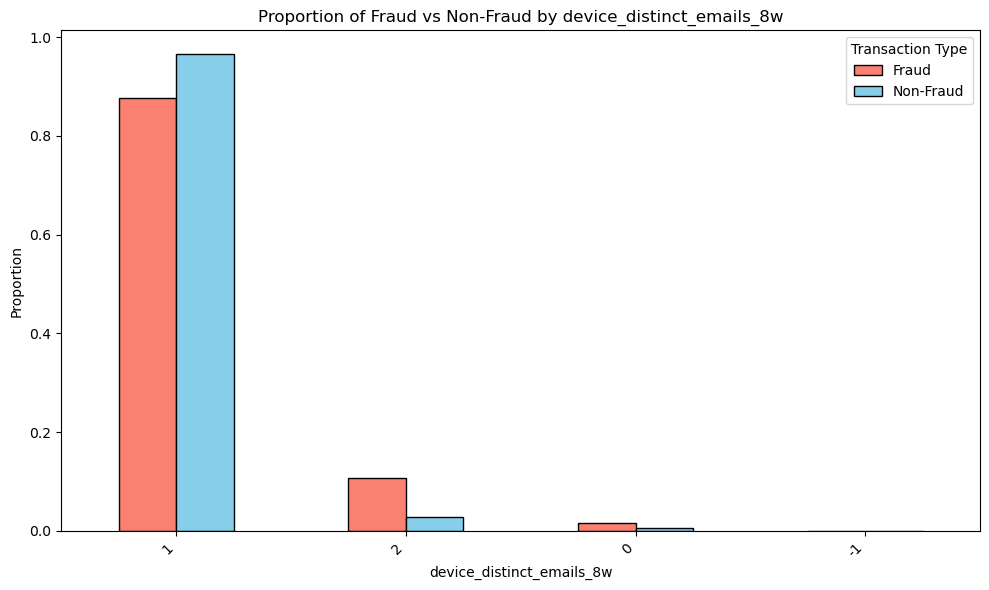


=== Fraud Cases Distribution by device_distinct_emails_8w ===
 device_distinct_emails_8w  Count  Proportion  Percentage
                         1   7142    0.876212       87.62
                         2    876    0.107471       10.75
                         0    130    0.015949        1.59
                        -1      3    0.000368        0.04

=== Non-Fraud Cases Distribution by device_distinct_emails_8w ===
 device_distinct_emails_8w  Count  Proportion  Percentage
                         1 759524    0.965286       96.53
                         2  21707    0.027588        2.76
                         0   5301    0.006737        0.67
                        -1    306    0.000389        0.04


In [54]:
device_distinct_emails_8w_counts_fraud = dataset.loc[dataset['fraud_bool'] == 1].shape[0]
device_distinct_emails_8w_counts_non_fraud = dataset.loc[dataset['fraud_bool'] == 0].shape[0]
fraud_counts = dataset[dataset['fraud_bool'] == 1]['device_distinct_emails_8w'].value_counts()
non_fraud_counts = dataset[dataset['fraud_bool'] == 0]['device_distinct_emails_8w'].value_counts()  
fraud_proportions = fraud_counts / device_distinct_emails_8w_counts_fraud
non_fraud_proportions = non_fraud_counts / device_distinct_emails_8w_counts_non_fraud
proportions_df = pd.DataFrame({
    'Fraud': fraud_proportions,
    'Non-Fraud': non_fraud_proportions
}).fillna(0)
# Now plot the stacked bar chart the proportions_df
proportions_df.plot(kind='bar', stacked=False, figsize=(10, 6), color=['salmon', 'skyblue'], edgecolor='black')
plt.title('Proportion of Fraud vs Non-Fraud by device_distinct_emails_8w')
plt.xlabel('device_distinct_emails_8w')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transaction Type', loc='upper right', labels=['Fraud', 'Non-Fraud'])
plt.tight_layout()
plt.show()
# Table with results
# Print summary table
print("\n=== Fraud Cases Distribution by device_distinct_emails_8w ===")
summary_df_fraud_by_device_distinct_emails_8w = pd.DataFrame({
    'device_distinct_emails_8w': fraud_counts.index,
    'Count': fraud_counts.values,
    'Proportion': fraud_proportions.values,
    'Percentage': (fraud_proportions.values * 100).round(2)
})  
print(summary_df_fraud_by_device_distinct_emails_8w.to_string(index=False))

# Print summary table
print("\n=== Non-Fraud Cases Distribution by device_distinct_emails_8w ===")
summary_df_non_fraud_by_device_distinct_emails_8w = pd.DataFrame({
    'device_distinct_emails_8w': non_fraud_counts.index,
    'Count': non_fraud_counts.values,
    'Proportion': non_fraud_proportions.values,
    'Percentage': (non_fraud_proportions.values * 100).round(2)
})      

print(summary_df_non_fraud_by_device_distinct_emails_8w.to_string(index=False))

**Slight** indication that between fraud and non-fraud users, the fraud users indicate that when they use 2 distinct emails more chances to be fraud while for <2 e-mails more non-fraud cases.

### days_since_request_binned

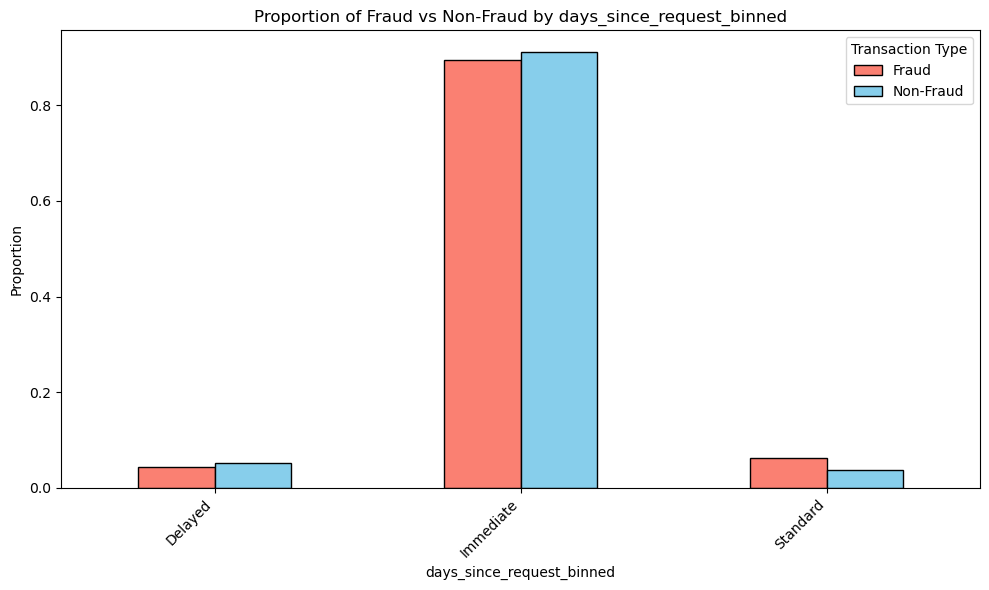


=== Fraud Cases Distribution by days_since_request_binned
days_since_request_binned  Count  Proportion  Percentage
                Immediate   7298    0.895350       89.54
                 Standard    505    0.061956        6.20
                  Delayed    348    0.042694        4.27

=== Non-Fraud Cases Distribution by days_since_request_binned
days_since_request_binned  Count  Proportion  Percentage
                Immediate 717189    0.911482       91.15
                  Delayed  40759    0.051801        5.18
                 Standard  28890    0.036717        3.67


In [55]:
days_since_request_binned_counts_fraud = dataset.loc[dataset['fraud_bool'] == 1].shape[0]
days_since_request_binned_counts_non_fraud = dataset.loc[dataset['fraud_bool'] == 0].shape[0]
fraud_counts = dataset[dataset['fraud_bool'] == 1]['days_since_request_binned'].value_counts()
non_fraud_counts = dataset[dataset['fraud_bool'] == 0]['days_since_request_binned'].value_counts()  
fraud_proportions = fraud_counts / days_since_request_binned_counts_fraud
non_fraud_proportions = non_fraud_counts / days_since_request_binned_counts_non_fraud
proportions_df = pd.DataFrame({
    'Fraud': fraud_proportions,
    'Non-Fraud': non_fraud_proportions
}).fillna(0)
# Now plot the stacked bar chart the proportions_df
proportions_df.plot(kind='bar', stacked=False, figsize=(10, 6), color=['salmon', 'skyblue'], edgecolor='black')
plt.title('Proportion of Fraud vs Non-Fraud by days_since_request_binned')
plt.xlabel('days_since_request_binned')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transaction Type', loc='upper right', labels=['Fraud', 'Non-Fraud'])
plt.tight_layout()
plt.show()
# Table with results
# Print summary table
print("\n=== Fraud Cases Distribution by days_since_request_binned")
summary_df_fraud_by_days_since_request_binned = pd.DataFrame({
    'days_since_request_binned': fraud_counts.index,
    'Count': fraud_counts.values,
    'Proportion': fraud_proportions.values,
    'Percentage': (fraud_proportions.values * 100).round(2)
})  
print(summary_df_fraud_by_days_since_request_binned.to_string(index=False))

# Print summary table
print("\n=== Non-Fraud Cases Distribution by days_since_request_binned")
summary_df_non_fraud_by_days_since_request_binned = pd.DataFrame({
    'days_since_request_binned': non_fraud_counts.index,
    'Count': non_fraud_counts.values,
    'Proportion': non_fraud_proportions.values,
    'Percentage': (non_fraud_proportions.values * 100).round(2)
})      

print(summary_df_non_fraud_by_days_since_request_binned.to_string(index=False))

**Too little differences**=> no strong association.

In [56]:
dataset=dataset.drop(columns="days_since_request_log",axis='columns')

### valid_transferred_amount

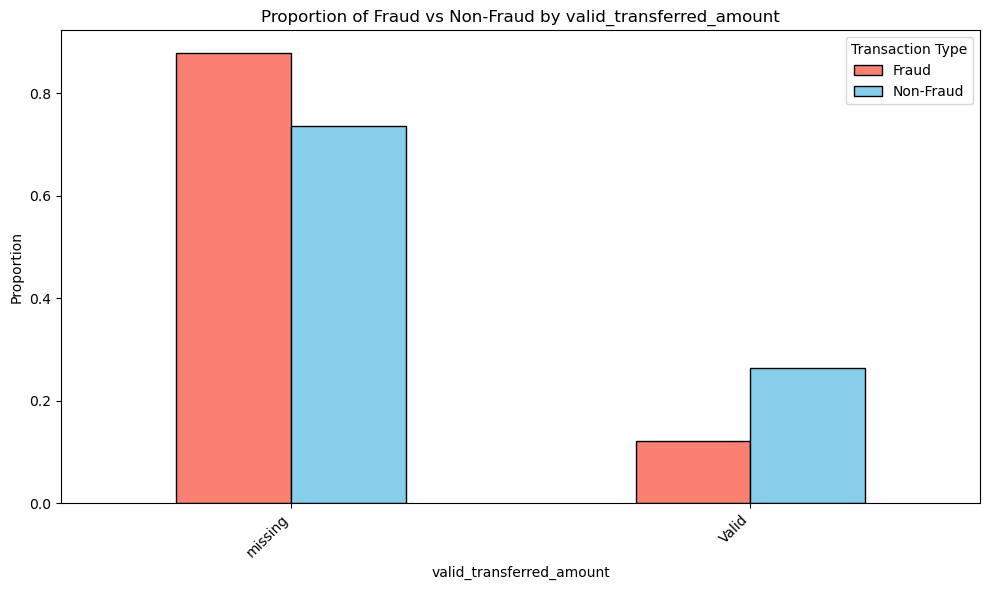


=== Fraud Cases Distribution by valid_transferred_amount
valid_transferred_amount  Count  Proportion  Percentage
                 missing   7160     0.87842       87.84
                   Valid    991     0.12158       12.16

=== Non-Fraud Cases Distribution by valid_transferred_amount
valid_transferred_amount  Count  Proportion  Percentage
                 missing 578748    0.735536       73.55
                   Valid 208090    0.264464       26.45


In [57]:
valid_transferred_amount_counts_fraud = dataset.loc[dataset['fraud_bool'] == 1].shape[0]
valid_transferred_amount_counts_non_fraud = dataset.loc[dataset['fraud_bool'] == 0].shape[0]
fraud_counts = dataset[dataset['fraud_bool'] == 1]['valid_transferred_amount'].value_counts()
non_fraud_counts = dataset[dataset['fraud_bool'] == 0]['valid_transferred_amount'].value_counts()  
fraud_proportions = fraud_counts / valid_transferred_amount_counts_fraud
non_fraud_proportions = non_fraud_counts / valid_transferred_amount_counts_non_fraud
proportions_df = pd.DataFrame({
    'Fraud': fraud_proportions,
    'Non-Fraud': non_fraud_proportions
}).fillna(0)
# Now plot the stacked bar chart the proportions_df
proportions_df.plot(kind='bar', stacked=False, figsize=(10, 6), color=['salmon', 'skyblue'], edgecolor='black')
plt.title('Proportion of Fraud vs Non-Fraud by valid_transferred_amount')
plt.xlabel('valid_transferred_amount')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transaction Type', loc='upper right', labels=['Fraud', 'Non-Fraud'])
plt.tight_layout()
plt.show()
# Table with results
# Print summary table
print("\n=== Fraud Cases Distribution by valid_transferred_amount")
summary_df_fraud_by_valid_transferred_amount = pd.DataFrame({
    'valid_transferred_amount': fraud_counts.index,
    'Count': fraud_counts.values,
    'Proportion': fraud_proportions.values,
    'Percentage': (fraud_proportions.values * 100).round(2)
})  
print(summary_df_fraud_by_valid_transferred_amount.to_string(index=False))

# Print summary table
print("\n=== Non-Fraud Cases Distribution by valid_transferred_amount")
summary_df_non_fraud_by_valid_transferred_amount = pd.DataFrame({
    'valid_transferred_amount': non_fraud_counts.index,
    'Count': non_fraud_counts.values,
    'Proportion': non_fraud_proportions.values,
    'Percentage': (non_fraud_proportions.values * 100).round(2)
})      

print(summary_df_non_fraud_by_valid_transferred_amount.to_string(index=False))

**Missing=> more chances to be fraud**

### intended_balcon_amount_binned

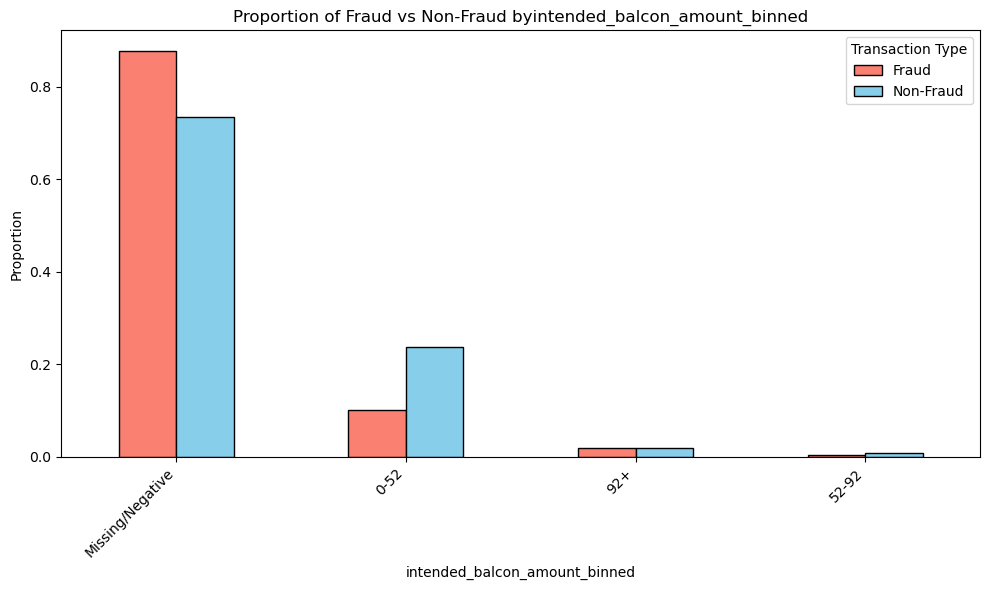


=== Fraud Cases Distribution by intended_balcon_amount_binned
intended_balcon_amount_binned  Count  Proportion  Percentage
             Missing/Negative   7160    0.878420       87.84
                         0-52    817    0.100233       10.02
                          92+    150    0.018403        1.84
                        52-92     24    0.002944        0.29

=== Non-Fraud Cases Distribution by intended_balcon_amount_binned
intended_balcon_amount_binned  Count  Proportion  Percentage
             Missing/Negative 578748    0.735536       73.55
                         0-52 186810    0.237419       23.74
                          92+  15075    0.019159        1.92
                        52-92   6205    0.007886        0.79


In [58]:
intended_balcon_amount_binned_counts_fraud = dataset.loc[dataset['fraud_bool'] == 1].shape[0]
intended_balcon_amount_binned_counts_non_fraud = dataset.loc[dataset['fraud_bool'] == 0].shape[0]
fraud_counts = dataset[dataset['fraud_bool'] == 1]['intended_balcon_amount_binned'].value_counts()
non_fraud_counts = dataset[dataset['fraud_bool'] == 0]['intended_balcon_amount_binned'].value_counts()  
fraud_proportions = fraud_counts / intended_balcon_amount_binned_counts_fraud
non_fraud_proportions = non_fraud_counts / intended_balcon_amount_binned_counts_non_fraud
proportions_df = pd.DataFrame({
    'Fraud': fraud_proportions,
    'Non-Fraud': non_fraud_proportions
}).fillna(0)
# Now plot the stacked bar chart the proportions_df
proportions_df.plot(kind='bar', stacked=False, figsize=(10, 6), color=['salmon', 'skyblue'], edgecolor='black')
plt.title('Proportion of Fraud vs Non-Fraud byintended_balcon_amount_binned')
plt.xlabel('intended_balcon_amount_binned')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transaction Type', loc='upper right', labels=['Fraud', 'Non-Fraud'])
plt.tight_layout()
plt.show()
# Table with results
# Print summary table
print("\n=== Fraud Cases Distribution by intended_balcon_amount_binned")
summary_df_fraud_by_intended_balcon_amount_binned = pd.DataFrame({
    'intended_balcon_amount_binned': fraud_counts.index,
    'Count': fraud_counts.values,
    'Proportion': fraud_proportions.values,
    'Percentage': (fraud_proportions.values * 100).round(2)
})  
print(summary_df_fraud_by_intended_balcon_amount_binned.to_string(index=False))

# Print summary table
print("\n=== Non-Fraud Cases Distribution by intended_balcon_amount_binned")
summary_df_non_fraud_by_intended_balcon_amount_binned = pd.DataFrame({
    'intended_balcon_amount_binned': non_fraud_counts.index,
    'Count': non_fraud_counts.values,
    'Proportion': non_fraud_proportions.values,
    'Percentage': (non_fraud_proportions.values * 100).round(2)
})      

print(summary_df_non_fraud_by_intended_balcon_amount_binned.to_string(index=False))

Need to combine categories since categories of 52-92, 92+ have same impact but too small sample size.

In [59]:
dataset["intended_balcon_amount_binned_engineered"]=np.where(dataset["intended_balcon_amount_binned"].isin(["52-92","92+"]),"52+",dataset["intended_balcon_amount_binned"])

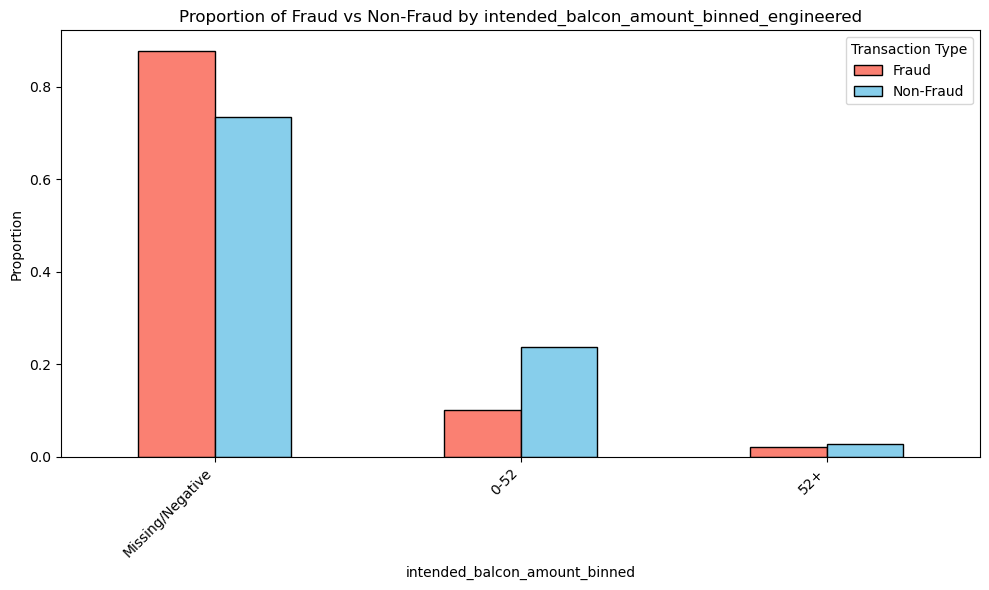


=== Fraud Cases Distribution by intended_balcon_amount_binned_engineered
intended_balcon_amount_binned_engineered  Count  Proportion  Percentage
                        Missing/Negative   7160    0.878420       87.84
                                    0-52    817    0.100233       10.02
                                     52+    174    0.021347        2.13

=== Non-Fraud Cases Distribution by intended_balcon_amount_binned_engineered
intended_balcon_amount_binned_engineered  Count  Proportion  Percentage
                        Missing/Negative 578748    0.735536       73.55
                                    0-52 186810    0.237419       23.74
                                     52+  21280    0.027045        2.70


In [60]:
intended_balcon_amount_binned_counts_fraud = dataset.loc[dataset['fraud_bool'] == 1].shape[0]
intended_balcon_amount_binned_counts_non_fraud = dataset.loc[dataset['fraud_bool'] == 0].shape[0]
fraud_counts = dataset[dataset['fraud_bool'] == 1]['intended_balcon_amount_binned_engineered'].value_counts()
non_fraud_counts = dataset[dataset['fraud_bool'] == 0]['intended_balcon_amount_binned_engineered'].value_counts()  
fraud_proportions = fraud_counts / intended_balcon_amount_binned_counts_fraud
non_fraud_proportions = non_fraud_counts / intended_balcon_amount_binned_counts_non_fraud
proportions_df = pd.DataFrame({
    'Fraud': fraud_proportions,
    'Non-Fraud': non_fraud_proportions
}).fillna(0)
# Now plot the stacked bar chart the proportions_df
proportions_df.plot(kind='bar', stacked=False, figsize=(10, 6), color=['salmon', 'skyblue'], edgecolor='black')
plt.title('Proportion of Fraud vs Non-Fraud by intended_balcon_amount_binned_engineered')
plt.xlabel('intended_balcon_amount_binned')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transaction Type', loc='upper right', labels=['Fraud', 'Non-Fraud'])
plt.tight_layout()
plt.show()
# Table with results
# Print summary table
print("\n=== Fraud Cases Distribution by intended_balcon_amount_binned_engineered")
summary_df_fraud_by_intended_balcon_amount_binned = pd.DataFrame({
    'intended_balcon_amount_binned_engineered': fraud_counts.index,
    'Count': fraud_counts.values,
    'Proportion': fraud_proportions.values,
    'Percentage': (fraud_proportions.values * 100).round(2)
})  
print(summary_df_fraud_by_intended_balcon_amount_binned.to_string(index=False))

# Print summary table
print("\n=== Non-Fraud Cases Distribution by intended_balcon_amount_binned_engineered")
summary_df_non_fraud_by_intended_balcon_amount_binned = pd.DataFrame({
    'intended_balcon_amount_binned_engineered': non_fraud_counts.index,
    'Count': non_fraud_counts.values,
    'Proportion': non_fraud_proportions.values,
    'Percentage': (non_fraud_proportions.values * 100).round(2)
})      

print(summary_df_non_fraud_by_intended_balcon_amount_binned.to_string(index=False))

**Indication** that cases with missing or negative amount may be fraud cases.

In [61]:
dataset=dataset.drop(columns="intended_balcon_amount_binned",axis='columns')

### bank_branch_count_8w_binned

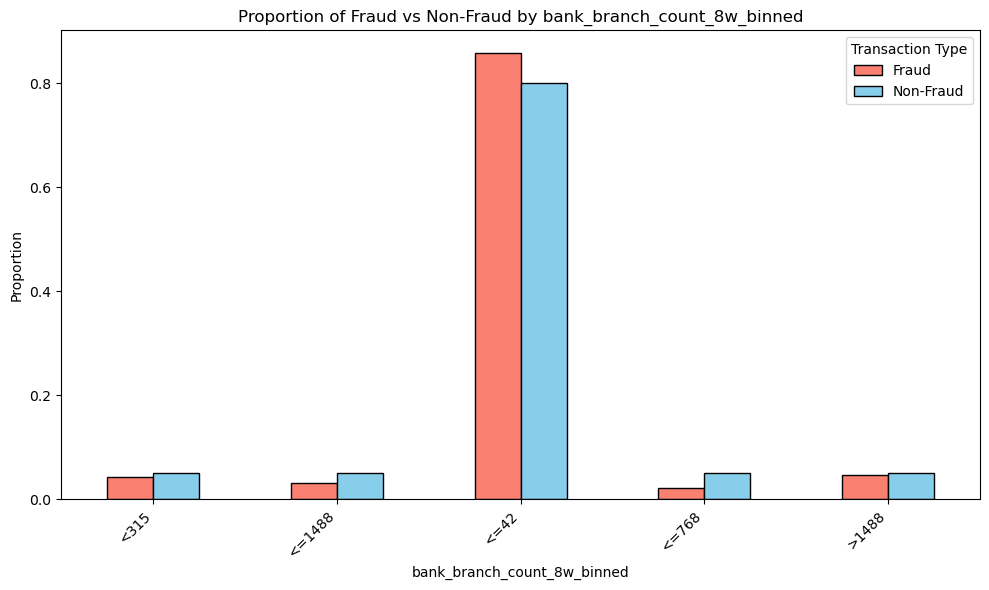


=== Fraud Cases Distribution by bank_branch_count_8w_binned
bank_branch_count_8w_binned  Count  Proportion  Percentage
                       <=42   7000    0.858790       85.88
                      >1488    376    0.046129        4.61
                       <315    342    0.041958        4.20
                     <=1488    256    0.031407        3.14
                      <=768    177    0.021715        2.17

=== Non-Fraud Cases Distribution by bank_branch_count_8w_binned
bank_branch_count_8w_binned  Count  Proportion  Percentage
                       <=42 629190    0.799644       79.96
                      <=768  39680    0.050430        5.04
                     <=1488  39386    0.050056        5.01
                      >1488  39367    0.050032        5.00
                       <315  39215    0.049839        4.98


In [62]:
bank_branch_count_8w_binned_counts_fraud = dataset.loc[dataset['fraud_bool'] == 1].shape[0]
bank_branch_count_8w_binned_counts_non_fraud = dataset.loc[dataset['fraud_bool'] == 0].shape[0]
fraud_counts = dataset[dataset['fraud_bool'] == 1]['bank_branch_count_8w_binned'].value_counts()
non_fraud_counts = dataset[dataset['fraud_bool'] == 0]['bank_branch_count_8w_binned'].value_counts()  
fraud_proportions = fraud_counts / bank_branch_count_8w_binned_counts_fraud
non_fraud_proportions = non_fraud_counts / bank_branch_count_8w_binned_counts_non_fraud
proportions_df = pd.DataFrame({
    'Fraud': fraud_proportions,
    'Non-Fraud': non_fraud_proportions
}).fillna(0)
# Now plot the stacked bar chart the proportions_df
proportions_df.plot(kind='bar', stacked=False, figsize=(10, 6), color=['salmon', 'skyblue'], edgecolor='black')
plt.title('Proportion of Fraud vs Non-Fraud by bank_branch_count_8w_binned')
plt.xlabel('bank_branch_count_8w_binned')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transaction Type', loc='upper right', labels=['Fraud', 'Non-Fraud'])
plt.tight_layout()
plt.show()
# Table with results
# Print summary table
print("\n=== Fraud Cases Distribution by bank_branch_count_8w_binned")
summary_df_fraud_by_bank_branch_count_8w_binned = pd.DataFrame({
    'bank_branch_count_8w_binned': fraud_counts.index,
    'Count': fraud_counts.values,
    'Proportion': fraud_proportions.values,
    'Percentage': (fraud_proportions.values * 100).round(2)
})  
print(summary_df_fraud_by_bank_branch_count_8w_binned.to_string(index=False))

# Print summary table
print("\n=== Non-Fraud Cases Distribution by bank_branch_count_8w_binned")
summary_df_non_fraud_by_bank_branch_count_8w_binned = pd.DataFrame({
    'bank_branch_count_8w_binned': non_fraud_counts.index,
    'Count': non_fraud_counts.values,
    'Proportion': non_fraud_proportions.values,
    'Percentage': (non_fraud_proportions.values * 100).round(2)
})      

print(summary_df_non_fraud_by_bank_branch_count_8w_binned.to_string(index=False))

Combine categories baving similar impact

In [63]:
dataset["bank_branch_count_8w_binned_engineered"]=np.where(dataset["bank_branch_count_8w_binned"].isin(["<=42"]),"<=42",">42")
dataset.drop(columns="bank_branch_count_8w_binned",inplace=True)
dataset.head(2)

,fraud_bool,date_of_birth_distinct_emails_4w,credit_risk_score,email_is_free,proposed_credit_limit,foreign_request,device_os,keep_alive_session,device_distinct_emails_8w,name_email_similarity_logit,...,bank_months_count_binary,customer_profile,residential_history_stability,banking_relationship_stability,income_level,customer_age_binned,payment_type_engineered,employment_status_engineered,intended_balcon_amount_binned_engineered,bank_branch_count_8w_binned_engineered
0,0,5,163,1,1500.0,0,linux,1,1,4.291948,...,bank_months_valid,prev_address_missing_current_address_valid_has...,prev_address_missing_current_address_valid,bank_months_valid_has_other_cards_invalid,<0.8,<=40 (less fraud),AA,CB,52+,<=42
1,0,18,154,1,1500.0,0,other,1,1,0.478637,...,bank_months_valid,prev_address_missing_current_address_valid_has...,prev_address_missing_current_address_valid,bank_months_valid_has_other_cards_invalid,0.8,<=40 (less fraud),Other,CA,Missing/Negative,<=42


### bank_months_count_binary

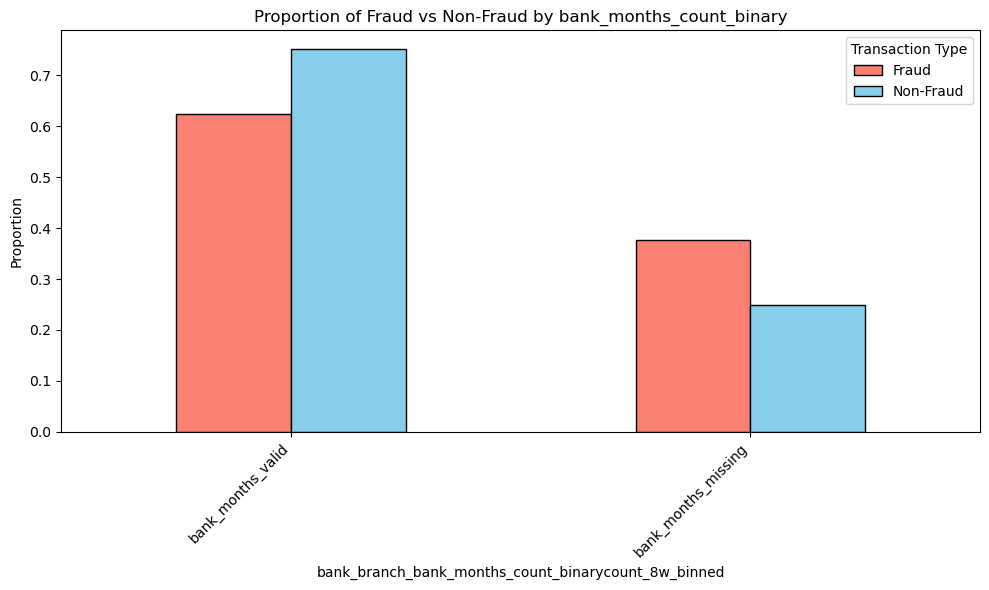


=== Fraud Cases Distribution by bank_months_count_binary
bank_months_count_binary  Count  Proportion  Percentage
       bank_months_valid   5087    0.624095       62.41
     bank_months_missing   3064    0.375905       37.59

=== Non-Fraud Cases Distribution by bank_months_count_binary
bank_months_count_binary  Count  Proportion  Percentage
       bank_months_valid 590353    0.750285       75.03
     bank_months_missing 196485    0.249715       24.97


In [64]:
bank_months_count_binary_counts_fraud = dataset.loc[dataset['fraud_bool'] == 1].shape[0]
bank_months_count_binary_counts_non_fraud = dataset.loc[dataset['fraud_bool'] == 0].shape[0]
fraud_counts = dataset[dataset['fraud_bool'] == 1]['bank_months_count_binary'].value_counts()
non_fraud_counts = dataset[dataset['fraud_bool'] == 0]['bank_months_count_binary'].value_counts()  
fraud_proportions = fraud_counts / bank_months_count_binary_counts_fraud
non_fraud_proportions = non_fraud_counts / bank_months_count_binary_counts_non_fraud
proportions_df = pd.DataFrame({
    'Fraud': fraud_proportions,
    'Non-Fraud': non_fraud_proportions
}).fillna(0)
# Now plot the stacked bar chart the proportions_df
proportions_df.plot(kind='bar', stacked=False, figsize=(10, 6), color=['salmon', 'skyblue'], edgecolor='black')
plt.title('Proportion of Fraud vs Non-Fraud by bank_months_count_binary')
plt.xlabel('bank_branch_bank_months_count_binarycount_8w_binned')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transaction Type', loc='upper right', labels=['Fraud', 'Non-Fraud'])
plt.tight_layout()
plt.show()
# Table with results
# Print summary table
print("\n=== Fraud Cases Distribution by bank_months_count_binary")
summary_df_fraud_by_bank_months_count_binary = pd.DataFrame({
    'bank_months_count_binary': fraud_counts.index,
    'Count': fraud_counts.values,
    'Proportion': fraud_proportions.values,
    'Percentage': (fraud_proportions.values * 100).round(2)
})  
print(summary_df_fraud_by_bank_months_count_binary.to_string(index=False))

# Print summary table
print("\n=== Non-Fraud Cases Distribution by bank_months_count_binary")
summary_df_non_fraud_by_bank_months_count_binary = pd.DataFrame({
    'bank_months_count_binary': non_fraud_counts.index,
    'Count': non_fraud_counts.values,
    'Proportion': non_fraud_proportions.values,
    'Percentage': (non_fraud_proportions.values * 100).round(2)
})      

print(summary_df_non_fraud_by_bank_months_count_binary.to_string(index=False))

**more chances** to be fraud when a customer has missing data about previous account in the bank.

### prev_address_months_binary

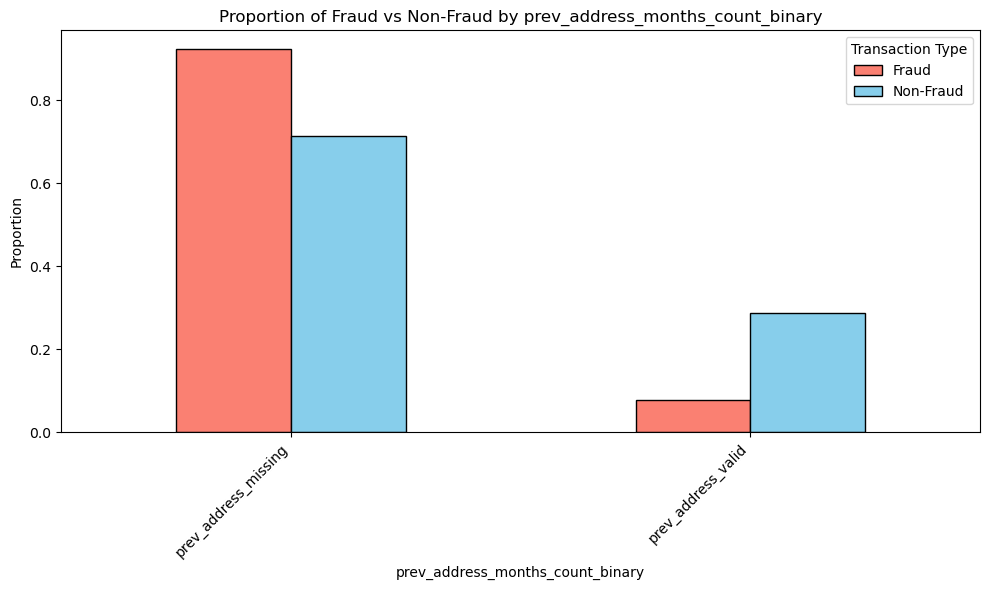


=== Fraud Cases Distribution by prev_address_months_count_binary
prev_address_months_binary  Count  Proportion  Percentage
      prev_address_missing   7517    0.922218       92.22
        prev_address_valid    634    0.077782        7.78

=== Non-Fraud Cases Distribution by prev_address_months_count_binary
prev_address_months_count_binary  Count  Proportion  Percentage
            prev_address_missing 560906    0.712861       71.29
              prev_address_valid 225932    0.287139       28.71


In [65]:
prev_address_months_binary_counts_fraud = dataset.loc[dataset['fraud_bool'] == 1].shape[0]
prev_address_months_binary_counts_non_fraud = dataset.loc[dataset['fraud_bool'] == 0].shape[0]
fraud_counts = dataset[dataset['fraud_bool'] == 1]['prev_address_months_count_binary'].value_counts()
non_fraud_counts = dataset[dataset['fraud_bool'] == 0]['prev_address_months_count_binary'].value_counts()  
fraud_proportions = fraud_counts / prev_address_months_binary_counts_fraud
non_fraud_proportions = non_fraud_counts / prev_address_months_binary_counts_non_fraud
proportions_df = pd.DataFrame({
    'Fraud': fraud_proportions,
    'Non-Fraud': non_fraud_proportions
}).fillna(0)
# Example for month (lines 914-921):
proportions_df.plot(kind='bar', stacked=False, figsize=(10, 6), color=['salmon', 'skyblue'], edgecolor='black')
plt.title('Proportion of Fraud vs Non-Fraud by prev_address_months_count_binary')
plt.xlabel('prev_address_months_count_binary')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transaction Type', loc='upper right', labels=['Fraud', 'Non-Fraud'])
plt.tight_layout()
plt.show()
# Table with results
# Print summary table
print("\n=== Fraud Cases Distribution by prev_address_months_count_binary")
summary_df_fraud_by_prev_address_months_binary = pd.DataFrame({
    'prev_address_months_binary': fraud_counts.index,
    'Count': fraud_counts.values,
    'Proportion': fraud_proportions.values,
    'Percentage': (fraud_proportions.values * 100).round(2)
})  
print(summary_df_fraud_by_prev_address_months_binary.to_string(index=False))

# Print summary table
print("\n=== Non-Fraud Cases Distribution by prev_address_months_count_binary")
summary_df_non_fraud_by_prev_address_months_binary = pd.DataFrame({
    'prev_address_months_count_binary': non_fraud_counts.index,
    'Count': non_fraud_counts.values,
    'Proportion': non_fraud_proportions.values,
    'Percentage': (non_fraud_proportions.values * 100).round(2)
})      

print(summary_df_non_fraud_by_prev_address_months_binary.to_string(index=False))

**Strong association** by the means of that when the prev address is unknown/missing=> more chances to be fraud.

### residential_history_stability

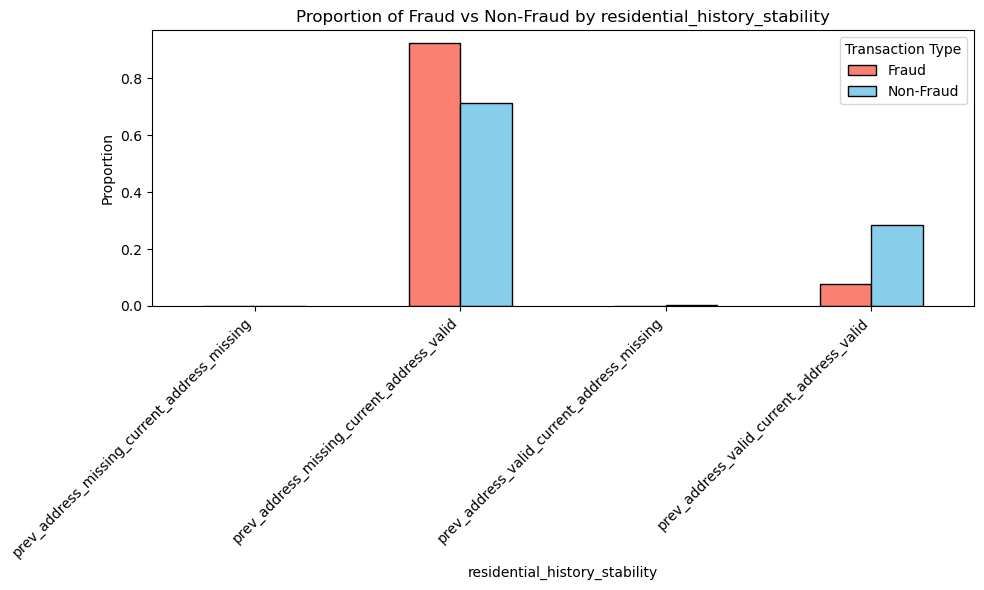


=== Fraud Cases Distribution by residential_history_stability
             residential_history_stability  Count  Proportion  Percentage
prev_address_missing_current_address_valid   7517    0.922218       92.22
  prev_address_valid_current_address_valid    625    0.076678        7.67
prev_address_valid_current_address_missing      9    0.001104        0.11

=== Non-Fraud Cases Distribution by month ===
               residential_history_stability  Count  Proportion  Percentage
  prev_address_missing_current_address_valid 560857    0.712799       71.28
    prev_address_valid_current_address_valid 222963    0.283366       28.34
  prev_address_valid_current_address_missing   2969    0.003773        0.38
prev_address_missing_current_address_missing     49    0.000062        0.01


In [66]:
residential_history_stability_counts_fraud = dataset.loc[dataset['fraud_bool'] == 1].shape[0]
residential_history_stability_counts_non_fraud = dataset.loc[dataset['fraud_bool'] == 0].shape[0]
fraud_counts = dataset[dataset['fraud_bool'] == 1]['residential_history_stability'].value_counts()
non_fraud_counts = dataset[dataset['fraud_bool'] == 0]['residential_history_stability'].value_counts()  
fraud_proportions = fraud_counts / residential_history_stability_counts_fraud
non_fraud_proportions = non_fraud_counts / residential_history_stability_counts_non_fraud
proportions_df = pd.DataFrame({
    'Fraud': fraud_proportions,
    'Non-Fraud': non_fraud_proportions
}).fillna(0)
# Example for month (lines 914-921):
proportions_df.plot(kind='bar', stacked=False, figsize=(10, 6), color=['salmon', 'skyblue'], edgecolor='black')
plt.title('Proportion of Fraud vs Non-Fraud by residential_history_stability')
plt.xlabel('residential_history_stability')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transaction Type', loc='upper right', labels=['Fraud', 'Non-Fraud'])
plt.tight_layout()
plt.show()
# Table with results
# Print summary table
print("\n=== Fraud Cases Distribution by residential_history_stability")
summary_df_fraud_by_residential_history_stability = pd.DataFrame({
    'residential_history_stability': fraud_counts.index,
    'Count': fraud_counts.values,
    'Proportion': fraud_proportions.values,
    'Percentage': (fraud_proportions.values * 100).round(2)
})  
print(summary_df_fraud_by_residential_history_stability.to_string(index=False))

# Print summary table
print("\n=== Non-Fraud Cases Distribution by month ===")
summary_df_non_fraud_by_residential_history_stability = pd.DataFrame({
    'residential_history_stability': non_fraud_counts.index,
    'Count': non_fraud_counts.values,
    'Proportion': non_fraud_proportions.values,
    'Percentage': (non_fraud_proportions.values * 100).round(2)
})      

print(summary_df_non_fraud_by_residential_history_stability.to_string(index=False))

**Indication** that the current address does not play an important role of separation and it is very rare or an error that the current address is missing since application without having available such address is not valid. Also, the sample size of current address missing is too small so not need to take into account such interaction and focus **only on prev_address**

In [67]:
dataset.drop(columns="residential_history_stability",inplace=True)

### customer_profile

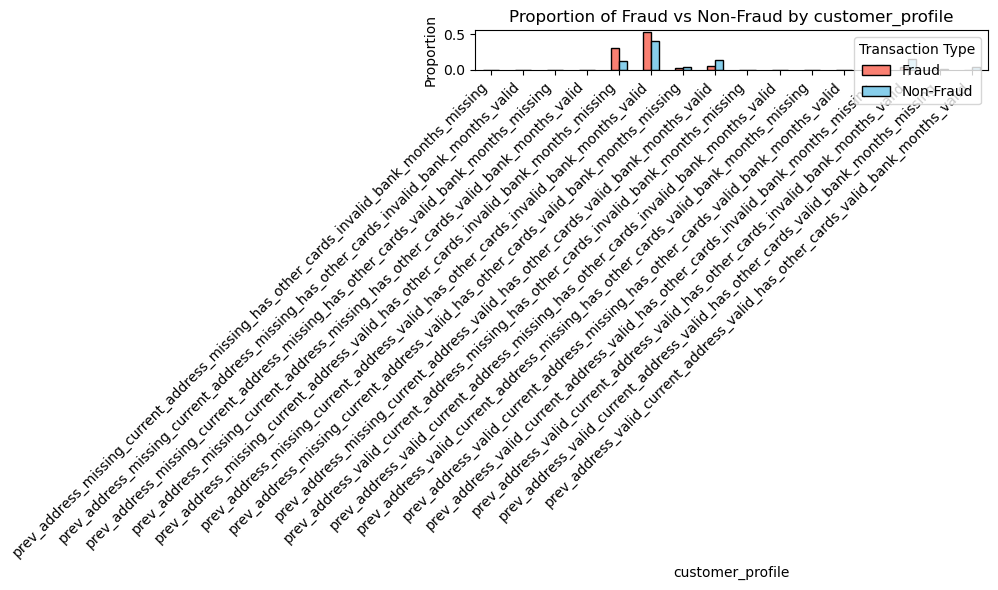


=== Fraud Cases Distribution by customer_profile ===
                                                                      customer_profile  Count  Proportion  Percentage
  prev_address_missing_current_address_valid_has_other_cards_invalid_bank_months_valid   4335    0.531837       53.18
prev_address_missing_current_address_valid_has_other_cards_invalid_bank_months_missing   2502    0.306956       30.70
    prev_address_missing_current_address_valid_has_other_cards_valid_bank_months_valid    420    0.051527        5.15
    prev_address_valid_current_address_valid_has_other_cards_invalid_bank_months_valid    304    0.037296        3.73
  prev_address_valid_current_address_valid_has_other_cards_invalid_bank_months_missing    279    0.034229        3.42
  prev_address_missing_current_address_valid_has_other_cards_valid_bank_months_missing    260    0.031898        3.19
    prev_address_valid_current_address_valid_has_other_cards_valid_bank_months_missing     22    0.002699        0.27
  

In [68]:
customer_profile_fraud = dataset.loc[dataset['fraud_bool'] == 1].shape[0]
customer_profile_non_fraud = dataset.loc[dataset['fraud_bool'] == 0].shape[0]
fraud_counts = dataset[dataset['fraud_bool'] == 1]['customer_profile'].value_counts()
non_fraud_counts = dataset[dataset['fraud_bool'] == 0]['customer_profile'].value_counts()  
fraud_proportions = fraud_counts / customer_profile_fraud
non_fraud_proportions = non_fraud_counts / customer_profile_non_fraud
proportions_df = pd.DataFrame({
    'Fraud': fraud_proportions,
    'Non-Fraud': non_fraud_proportions
}).fillna(0)
# Example for customer_profile (lines 914-921):
proportions_df.plot(kind='bar', stacked=False, figsize=(10, 6), color=['salmon', 'skyblue'], edgecolor='black')
plt.title('Proportion of Fraud vs Non-Fraud by customer_profile')
plt.xlabel('customer_profile')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transaction Type', loc='upper right', labels=['Fraud', 'Non-Fraud'])
plt.tight_layout()
plt.show()
# Table with results
# Print summary table
print("\n=== Fraud Cases Distribution by customer_profile ===")
summary_df_fraud_by_customer_profile = pd.DataFrame({
    'customer_profile': fraud_counts.index,
    'Count': fraud_counts.values,
    'Proportion': fraud_proportions.values,
    'Percentage': (fraud_proportions.values * 100).round(2)
})  
print(summary_df_fraud_by_customer_profile.to_string(index=False))

# Print summary table
print("\n=== Non-Fraud Cases Distribution by customer_profile ===")
summary_df_non_fraud_by_customer_profile = pd.DataFrame({
    'customer_profile': non_fraud_counts.index,
    'Count': non_fraud_counts.values,
    'Proportion': non_fraud_proportions.values,
    'Percentage': (non_fraud_proportions.values * 100).round(2)
})      

print(summary_df_non_fraud_by_customer_profile.to_string(index=False))

**Inference**: Since customer profile has too many categories with too small sample size as well as including interactions of features that have been already studied above, it may be a feature towards overfitting, thus need to avoid overfitting.

In [69]:
dataset.drop(columns="customer_profile",inplace=True)

### banking_relationship_stability

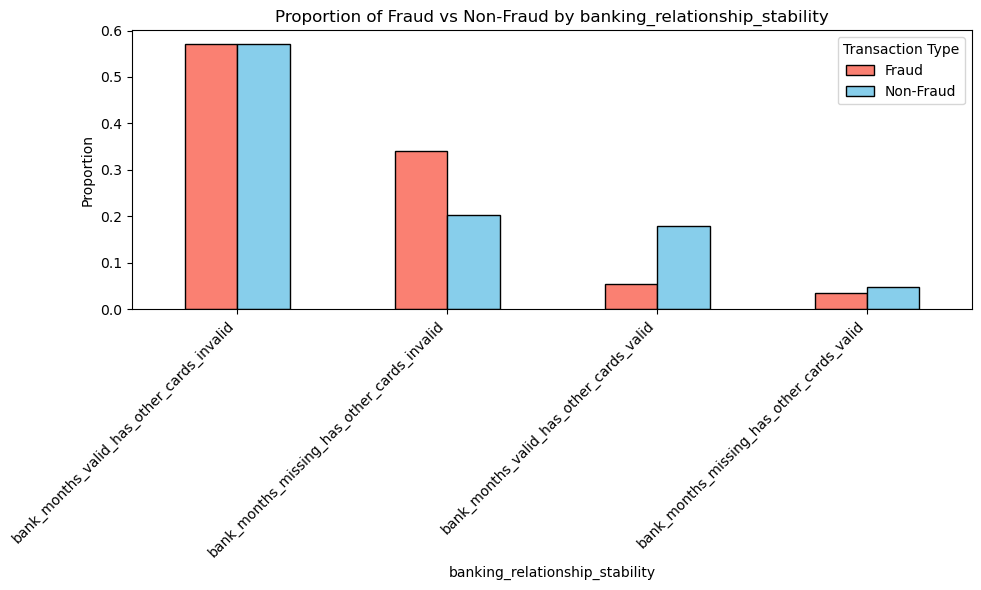


=== Fraud Cases Distribution by banking_relationship_stability ===
             banking_relationship_stability  Count  Proportion  Percentage
  bank_months_valid_has_other_cards_invalid   4647    0.570114       57.01
bank_months_missing_has_other_cards_invalid   2782    0.341308       34.13
    bank_months_valid_has_other_cards_valid    440    0.053981        5.40
  bank_months_missing_has_other_cards_valid    282    0.034597        3.46

=== Non-Fraud Cases Distribution by banking_relationship_stability
             banking_relationship_stability  Count  Proportion  Percentage
  bank_months_valid_has_other_cards_invalid 449920    0.571808       57.18
bank_months_missing_has_other_cards_invalid 159373    0.202549       20.25
    bank_months_valid_has_other_cards_valid 140433    0.178478       17.85
  bank_months_missing_has_other_cards_valid  37112    0.047166        4.72


In [70]:
banking_relationship_stability_fraud = dataset.loc[dataset['fraud_bool'] == 1].shape[0]
banking_relationship_stability_non_fraud = dataset.loc[dataset['fraud_bool'] == 0].shape[0]
fraud_counts = dataset[dataset['fraud_bool'] == 1]['banking_relationship_stability'].value_counts()
non_fraud_counts = dataset[dataset['fraud_bool'] == 0]['banking_relationship_stability'].value_counts()  
fraud_proportions = fraud_counts / banking_relationship_stability_fraud
non_fraud_proportions = non_fraud_counts / banking_relationship_stability_non_fraud
proportions_df = pd.DataFrame({
    'Fraud': fraud_proportions,
    'Non-Fraud': non_fraud_proportions
}).fillna(0)
# Example for banking_relationship_stability (lines 914-921):
proportions_df.plot(kind='bar', stacked=False, figsize=(10, 6), color=['salmon', 'skyblue'], edgecolor='black')
plt.title('Proportion of Fraud vs Non-Fraud by banking_relationship_stability')
plt.xlabel('banking_relationship_stability')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transaction Type', loc='upper right', labels=['Fraud', 'Non-Fraud'])
plt.tight_layout()
plt.show()
# Table with results
# Print summary table
print("\n=== Fraud Cases Distribution by banking_relationship_stability ===")
summary_df_fraud_by_banking_relationship_stability = pd.DataFrame({
    'banking_relationship_stability': fraud_counts.index,
    'Count': fraud_counts.values,
    'Proportion': fraud_proportions.values,
    'Percentage': (fraud_proportions.values * 100).round(2)
})  
print(summary_df_fraud_by_banking_relationship_stability.to_string(index=False))

# Print summary table
print("\n=== Non-Fraud Cases Distribution by banking_relationship_stability")
summary_df_non_fraud_by_banking_relationship_stability = pd.DataFrame({
    'banking_relationship_stability': non_fraud_counts.index,
    'Count': non_fraud_counts.values,
    'Proportion': non_fraud_proportions.values,
    'Percentage': (non_fraud_proportions.values * 100).round(2)
})      

print(summary_df_non_fraud_by_banking_relationship_stability.to_string(index=False))

**It seems slightly important association** since it is clear that when both other cards and previous account in bank are missing, there are more chances to be fraud.

Also, since the interaction of both **bank_months_count_binary** and **has_oher_cards** seems important feature, no need to include also bank_months_count_binary since it is already included in the interaction feature.

In [71]:
dataset.drop(columns="bank_months_count_binary",inplace=True)

In [72]:
dataset.head(1)

,fraud_bool,date_of_birth_distinct_emails_4w,credit_risk_score,email_is_free,proposed_credit_limit,foreign_request,device_os,keep_alive_session,device_distinct_emails_8w,name_email_similarity_logit,...,phone_home_and_mobile_valid,proposed_credit_limit_binned,prev_address_months_count_binary,banking_relationship_stability,income_level,customer_age_binned,payment_type_engineered,employment_status_engineered,intended_balcon_amount_binned_engineered,bank_branch_count_8w_binned_engineered
0,0,5,163,1,1500.0,0,linux,1,1,4.291948,...,Invalid_Valid,1000+,prev_address_missing,bank_months_valid_has_other_cards_invalid,<0.8,<=40 (less fraud),AA,CB,52+,<=42


**Most influential categorical features are**:

1) email_is_free
2) foreign_request (little important)
3) device_os
4) keep_alive_session
5) device_distinct_emails_8w
6) month (**to be considered as in paper for test dataset performance evaluation**)
7) days_since_request_binned (**Standard** time interval from application date is the most suspicious for fraud!)
8) valid_transferred_amount
9) housing_status_engineered
10) phone_home_and_mobile_valid
11) proposed_credit_limit_binned
12) prev_address_months_count_binary
13) banking_relationship_stability
14) income_level
15) customer_age_binned
16) payment_type_engineered
17) employment_status_engineered
18) intended_balcon_amount_binned_engineered
19) bank_branch_count_8w_binned_engineered

In [73]:
dataset.to_csv("train_dataset_feature_engineered_interim.csv",index=False)

## Transformation of the variables

In [ ]:
dataset=pd.read_csv("train_dataset_feature_engineered_interim.csv")

### Target Encoding features

### One-hot encoding

## Conclusion

The final dataset includes the most prominent features to efficiently separate behaviors of fraudulent applications against non fraudulent ones. In some cases such as proposed_credit_limit continous feature, we have also included its own categorical feature since the categorical feature may include more noise and thus potential feature importance algorithm may suggest its own interaction or let this feature selection routine to identify which one is the best combination. Such process could be also followed for the age of customers but in such cases the trends of categorical features seemed more distinct!

In [ ]:
dataset.to_csv("train_dataset_final_feature_engineered.csv",index=False)